In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pickle
import yaml
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
import pacc
import random
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams.update({'font.size': 22})
plt.rc('legend',fontsize=18)
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.10.0


## Load Data

In [2]:
s_3x2 = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_3x2 = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

In [3]:
cle_3x2  = pacc.ClsEnsemble(s_3x2, y_3x2,   label="CosmoDC2 3x2  - data")

In [4]:
data = np.load("/home/jaimerzp/Documents/UCL/3x2_analytical/fixed_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/data_1.npz")
cle_3x2_fake = pacc.ClTheoryEnsemble(cle_3x2, data["data"], label="CosmoDC2 3x2 - Synthetic data")

In [5]:
tpts = np.load("covs/COSMODC2/comp_covs.npz")
cov = np.diag(tpts["cov"])
tt_dz   = np.diag(tpts["TT_dz"])   - cov
tt_wzdz = np.diag(tpts["TT_wzdz"]) - cov
tt_pca  = np.diag(tpts["TT_pca"])  - cov
tt_gp   = np.diag(tpts["TT_gp"])   - cov
total_l = 0
_tt_dz = []
_tt_wzdz = []
_tt_pca = []
_tt_gp = []
_cov = []
for d in cle_3x2.data:
    dz = tt_dz[total_l:total_l+len(d)]
    wzdz = tt_wzdz[total_l:total_l+len(d)]
    pca = tt_pca[total_l:total_l+len(d)]
    gp = tt_gp[total_l:total_l+len(d)]
    c = cov[total_l:total_l+len(d)]
    _tt_dz.append(dz/c)
    _tt_wzdz.append(wzdz/c)
    _tt_pca.append(pca/c)
    _tt_gp.append(gp/c)
    _cov.append(c)
    total_l += len(d)

cle_3x2_tt_dz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$\delta z$")
cle_3x2_tt_dz.errs = _tt_dz
cle_3x2_tt_wzdz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$w_z \, \delta z$")
cle_3x2_tt_wzdz.errs = _tt_wzdz
cle_3x2_tt_pca = pacc.ClsEnsemble(s_3x2, y_3x2,   label="PCA")
cle_3x2_tt_pca.errs = _tt_pca
cle_3x2_tt_gp = pacc.ClsEnsemble(s_3x2, y_3x2,   label="GP")
cle_3x2_tt_gp.errs = _tt_gp

In [6]:
labels = [
    r'$\left(\frac{\partial t^{\rm lens \, 1} \partial t^{\rm lens \, 1}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 2} \partial t^{\rm lens \, 2}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 3} \partial t^{\rm lens \, 3}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 4} \partial t^{\rm lens \, 4}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 5} \partial t^{\rm lens \, 5}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 1} \partial t^{\rm source \, 1}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 2} \partial t^{\rm source \, 2}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 3} \partial t^{\rm source \, 3}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 4} \partial t^{\rm source \, 4}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 5} \partial t^{\rm source \, 5}}{\partial_\theta^2}\right)/ \mathbb{C}$',
]

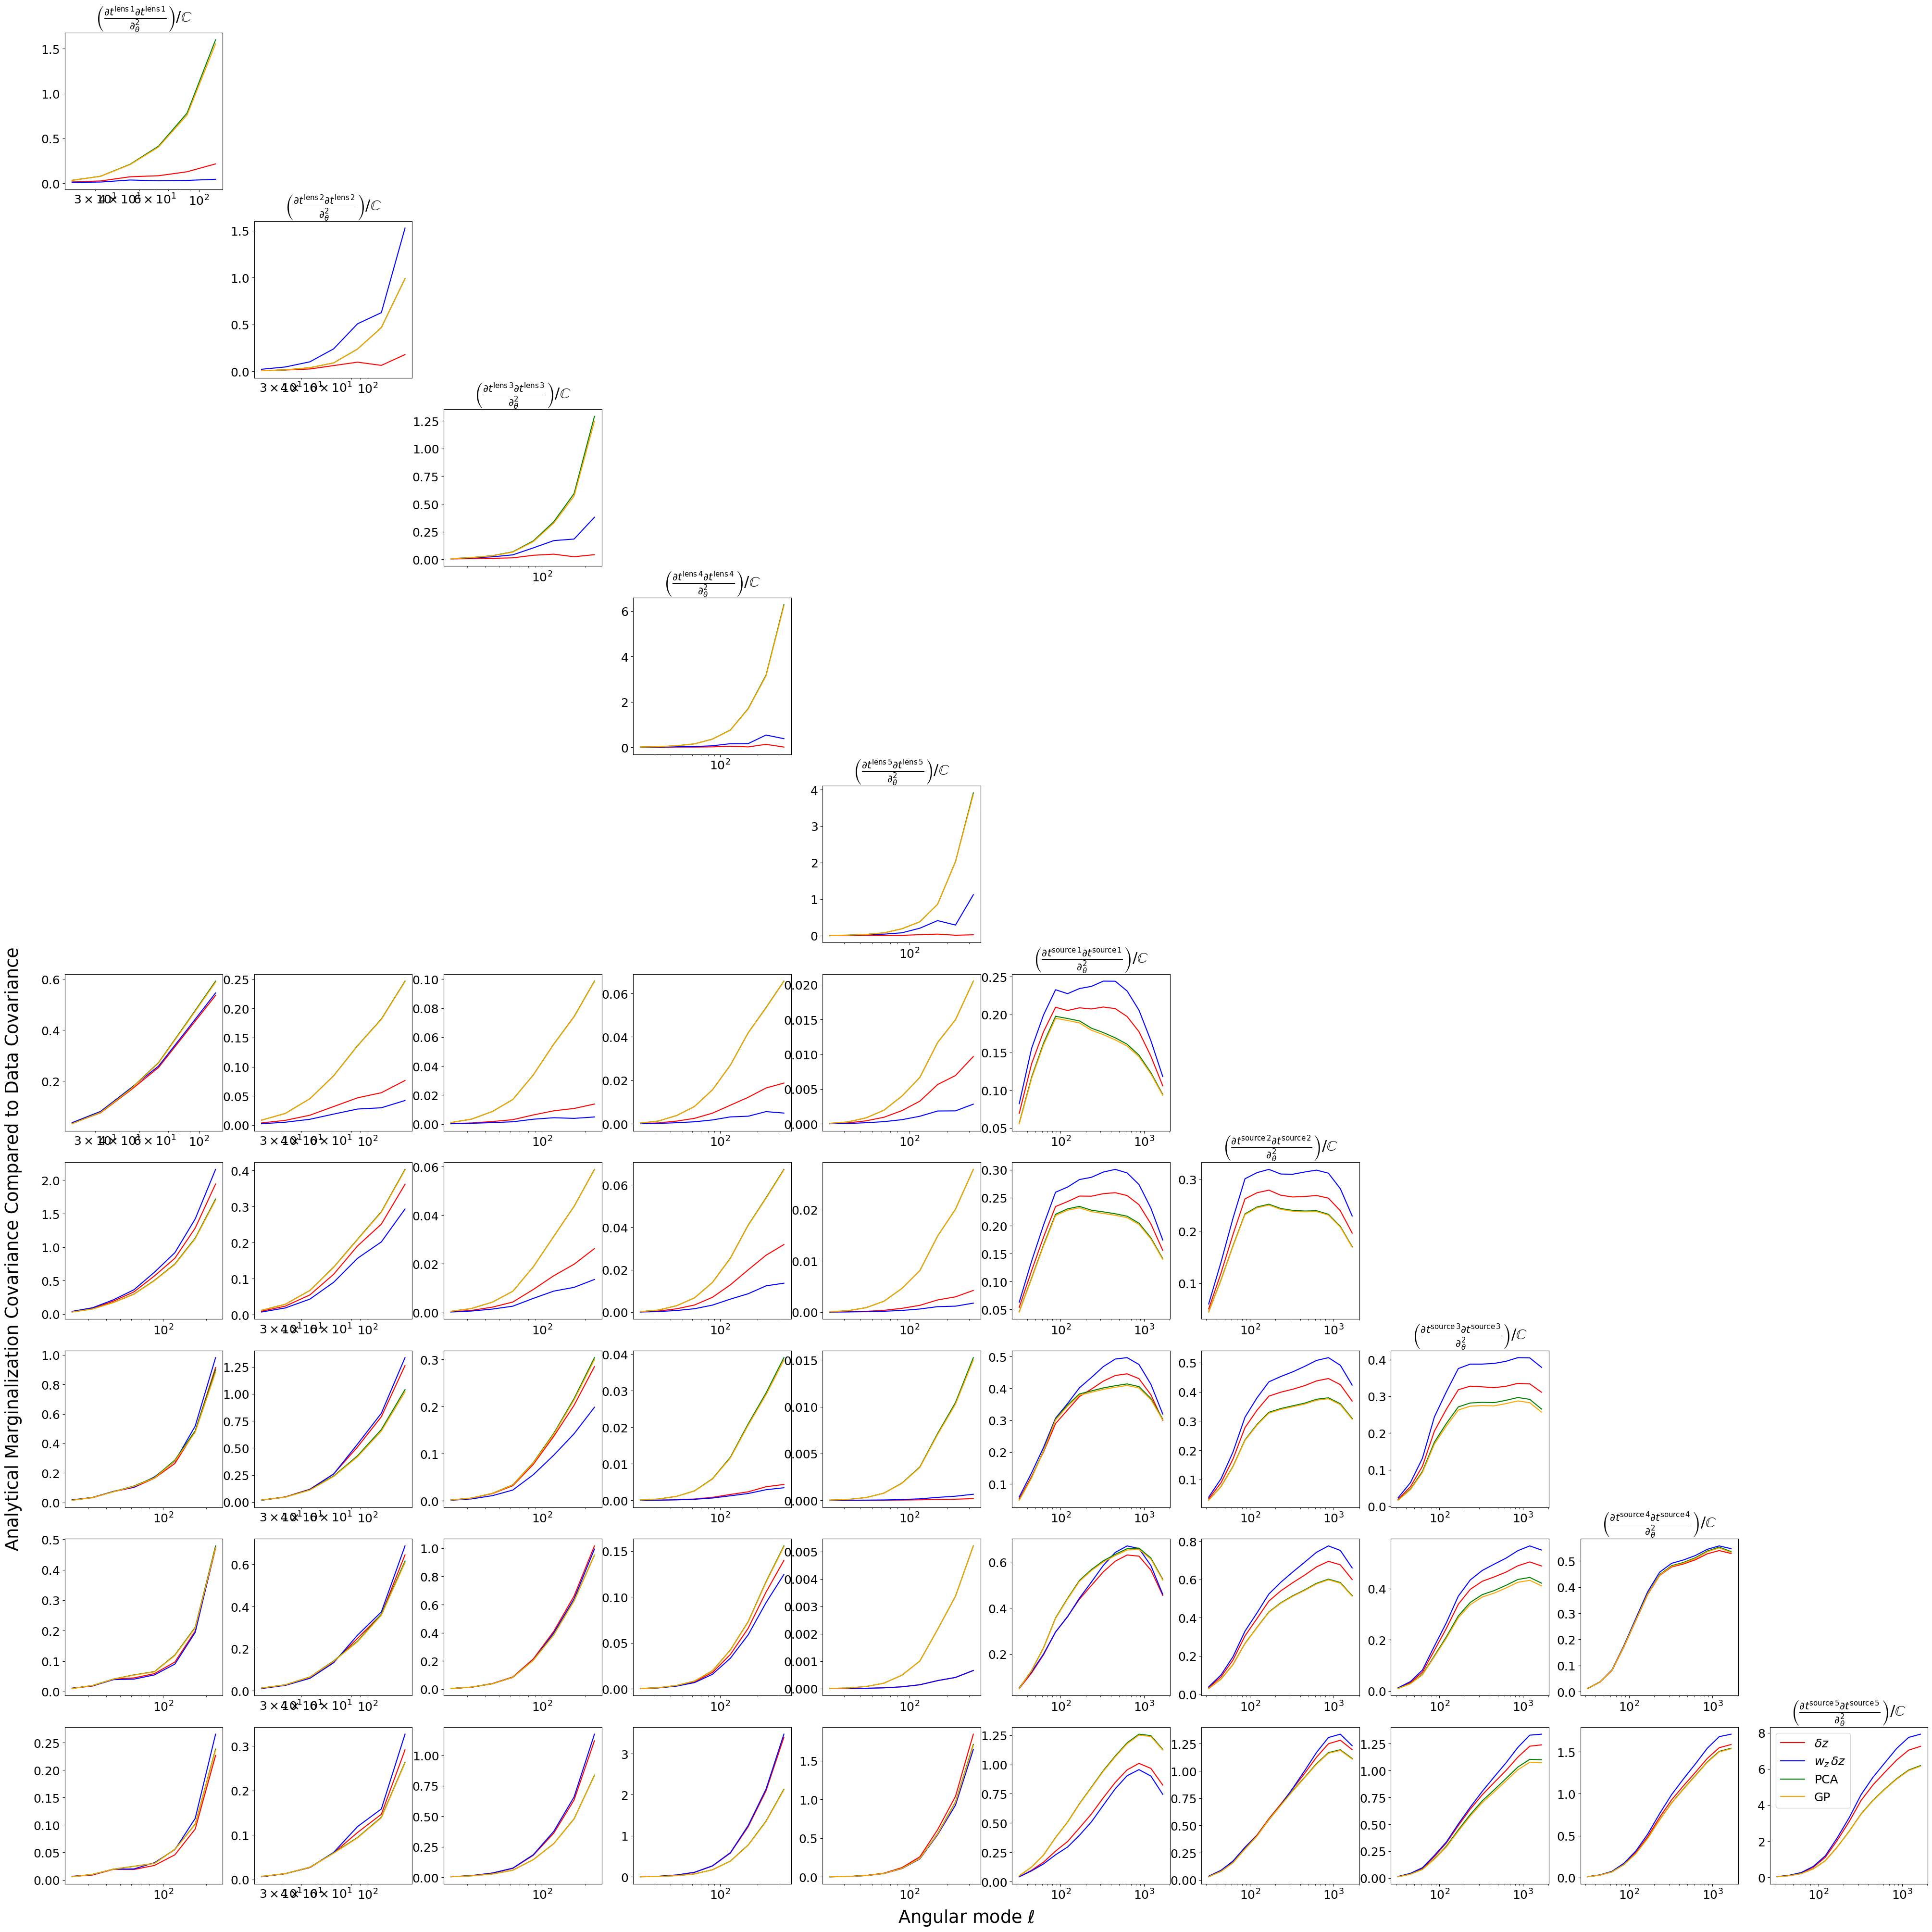

In [7]:
colors = ['r', 'b', 'g', 'orange']
g = pacc.plot_errs([[cle_3x2_tt_dz, cle_3x2_tt_wzdz, cle_3x2_tt_pca, cle_3x2_tt_gp]], cle_3x2.pairs,
               configs=[{'colors': colors},
                        {'colors': colors}, 
                        {'colors': colors}, 
                        {'colors': colors}],
                labels=labels);
g.savefig("./paper_plots/tpts_3x2.pdf", bbox_inches='tight')

In [8]:
labels = [
    r'$C_\ell^{\rm lens 1 \, lens 1}$',
    r'$C_\ell^{\rm lens 2 \, lens 2}$',
    r'$C_\ell^{\rm lens 3 \, lens 3}$',
    r'$C_\ell^{\rm lens 4 \, lens 4}$',
    r'$C_\ell^{\rm lens 5 \, lens 5}$',
    r'$C_\ell^{\rm source 1 \, source 1}$',
    r'$C_\ell^{\rm source 2 \, source 2}$',
    r'$C_\ell^{\rm source 3 \, source 3}$',
    r'$C_\ell^{\rm source 4 \, source 4}$',
    r'$C_\ell^{\rm source 5 \, source 5}$',
]

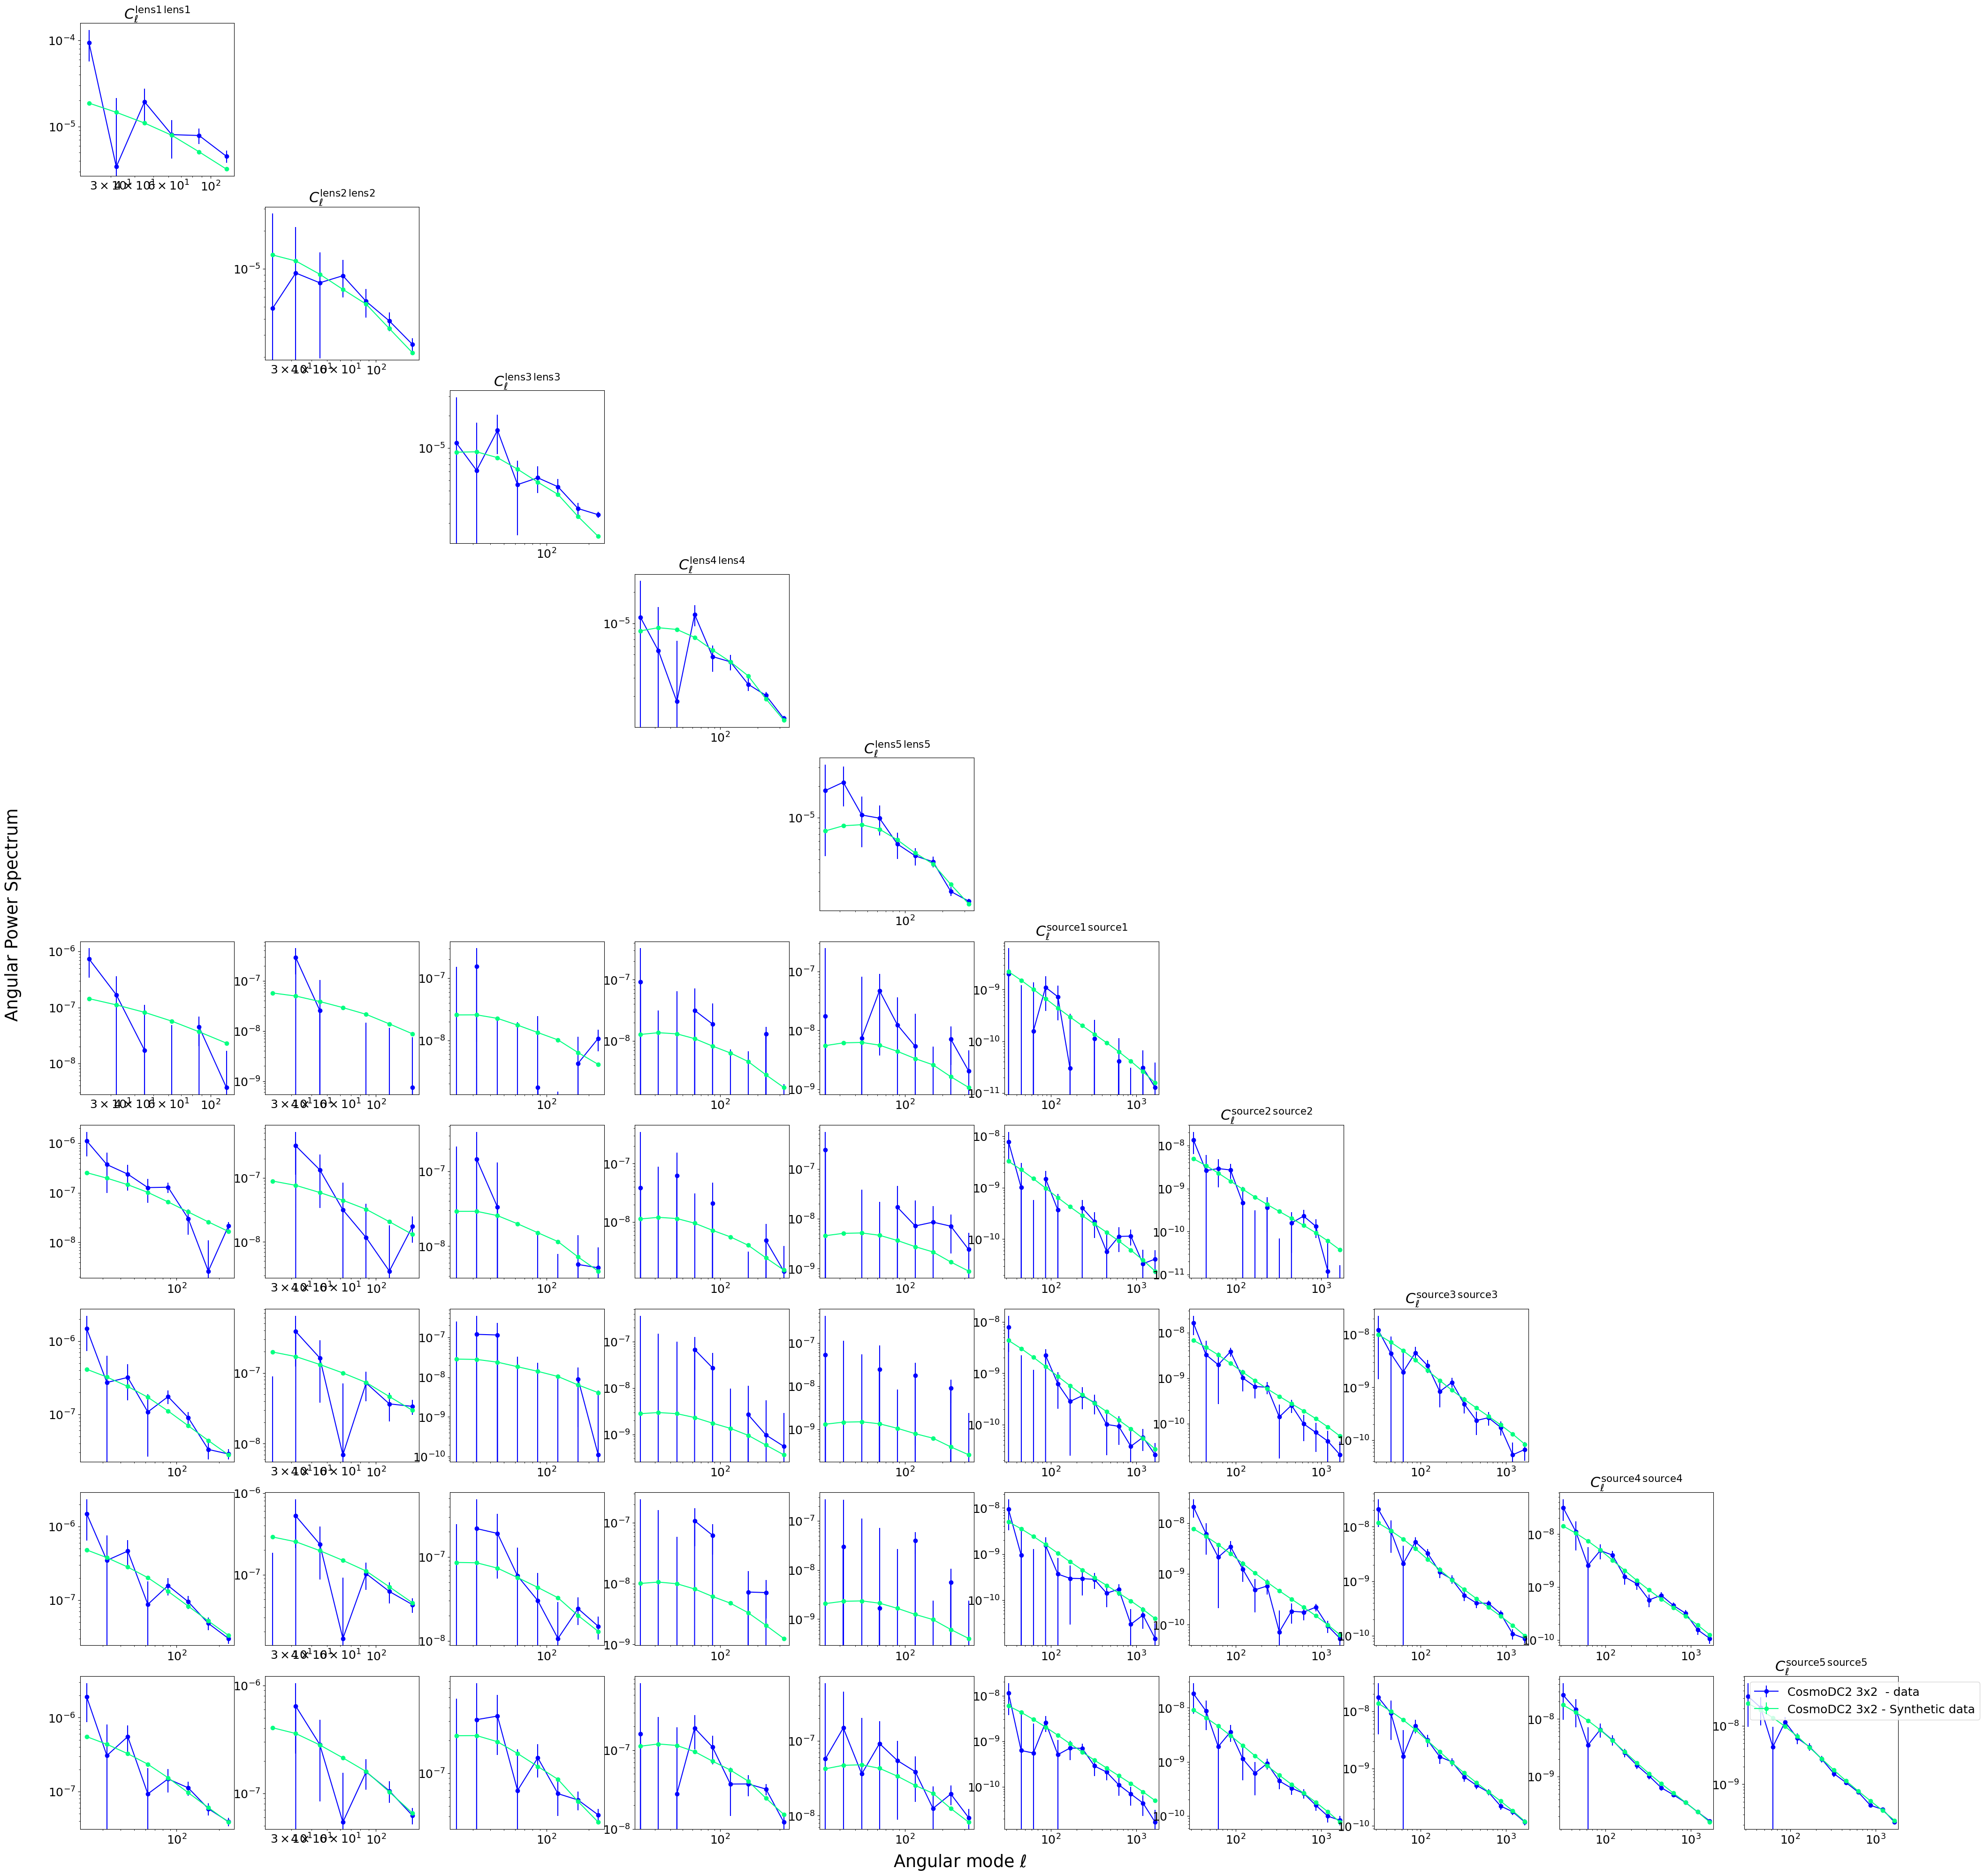

In [9]:
g = pacc.plot_cls([[cle_3x2, cle_3x2_fake]], cle_3x2.pairs, labels=labels);
g.savefig("./paper_plots/data_3x2.pdf", bbox_inches='tight')

In [ ]:
from numpy.random import multivariate_normal as mvn
wzdz_path = "./data/CosmoDC2/image_wzdz_bpz_priors/"
nz_lens_0 = np.load(wzdz_path + "wzdz_lens_0.npz")
nz_lens_1 = np.load(wzdz_path + "wzdz_lens_1.npz")
nz_lens_2 = np.load(wzdz_path + "wzdz_lens_2.npz")
nz_lens_3 = np.load(wzdz_path + "wzdz_lens_3.npz")
nz_lens_4 = np.load(wzdz_path + "wzdz_lens_4.npz")
nz_source_0 = np.load(wzdz_path + "wzdz_source_0.npz")
nz_source_1 = np.load(wzdz_path + "wzdz_source_1.npz")
nz_source_2 = np.load(wzdz_path + "wzdz_source_2.npz")
nz_source_3 = np.load(wzdz_path + "wzdz_source_3.npz")
nz_source_4 = np.load(wzdz_path + "wzdz_source_4.npz")

thetas_lens_0 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_0["cov"]) for _ in range(5_000)]).T
thetas_lens_1 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_1["cov"]) for _ in range(5_000)]).T
thetas_lens_2 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_2["cov"]) for _ in range(5_000)]).T
thetas_lens_3 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_3["cov"]) for _ in range(5_000)]).T
thetas_lens_4 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_4["cov"]) for _ in range(5_000)]).T
thetas_source_0 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_0["cov"]) for _ in range(5_000)]).T
thetas_source_1 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_1["cov"]) for _ in range(5_000)]).T
thetas_source_2 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_2["cov"]) for _ in range(5_000)]).T
thetas_source_3 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_3["cov"]) for _ in range(5_000)]).T
thetas_source_4 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_4["cov"]) for _ in range(5_000)]).T

prior_wzdz_chain = {}
prior_wzdz_chain["dz_lens_0"] = thetas_lens_0[0]
prior_wzdz_chain["wz_lens_0"] = thetas_lens_0[1]
prior_wzdz_chain["dz_lens_1"] = thetas_lens_1[0]
prior_wzdz_chain["wz_lens_1"] = thetas_lens_1[1]
prior_wzdz_chain["dz_lens_2"] = thetas_lens_2[0]
prior_wzdz_chain["wz_lens_2"] = thetas_lens_2[1]
prior_wzdz_chain["dz_lens_3"] = thetas_lens_3[0]
prior_wzdz_chain["wz_lens_3"] = thetas_lens_3[1]
prior_wzdz_chain["dz_lens_4"] = thetas_lens_4[0]
prior_wzdz_chain["wz_lens_4"] = thetas_lens_4[1]
prior_wzdz_chain["dz_source_0"] = thetas_source_0[0]
prior_wzdz_chain["wz_source_0"] = thetas_source_0[1]
prior_wzdz_chain["dz_source_1"] = thetas_source_1[0]
prior_wzdz_chain["wz_source_1"] = thetas_source_1[1]
prior_wzdz_chain["dz_source_2"] = thetas_source_2[0]
prior_wzdz_chain["wz_source_2"] = thetas_source_2[1]
prior_wzdz_chain["dz_source_3"] = thetas_source_3[0]
prior_wzdz_chain["wz_source_3"] = thetas_source_3[1]
prior_wzdz_chain["dz_source_4"] = thetas_source_4[0]
prior_wzdz_chain["wz_source_4"] = thetas_source_4[1]

## Load Chains

In [11]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chain = pd.DataFrame(np.array(chain)[50:, :], columns=chain.columns)
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [12]:

path_3x2_nuisance_nomarg = "fixed_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_nomarg_old = "nuisance_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03_2/"

path_3x2_nuisance_dz_ana = "fixed_fake_chains/analytical/CosmoDC2_3x2_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_wzdz_ana= "fixed_fake_chains/analytical/CosmoDC2_3x2_wzdz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_PCA_ana = "fixed_fake_chains/analytical/CosmoDC2_3x2_PCA_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_gp_ana = "fixed_fake_chains/analytical/CosmoDC2_3x2_gp_ana_TAP_0.65_init_ϵ_0.03/"

path_3x2_nuisance_dz_mum = "fixed_fake_chains/numerical/CosmoDC2_3x2_Gibbs_dz_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.05/"
path_3x2_nuisance_wzdz_num = "fixed_fake_chains/numerical/CosmoDC2_3x2_Gibbs_wzdz_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.03/"
path_3x2_nuisance_PCA_num = "fixed_fake_chains/numerical/CosmoDC2_3x2_Gibbs_PCA_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.05/"
path_3x2_nuisance_gp_num = "fixed_fake_chains/numerical/CosmoDC2_3x2_Gibbs_gp_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.05/"

In [13]:
chain_3x2_nuisance_nomarg = add_chains([path_3x2_nuisance_nomarg])
chain_3x2_nuisance_nomarg_old = add_chains([path_3x2_nuisance_nomarg_old])

chain_3x2_nuisance_dz_ana = add_chains([path_3x2_nuisance_dz_ana])
chain_3x2_nuisance_wzdz_ana = add_chains([path_3x2_nuisance_wzdz_ana])
chain_3x2_nuisance_PCA_ana = add_chains([path_3x2_nuisance_PCA_ana])
chain_3x2_nuisance_gp_ana = add_chains([path_3x2_nuisance_gp_ana])

chain_3x2_nuisance_dz_num = add_chains([path_3x2_nuisance_dz_mum])
chain_3x2_nuisance_wzdz_num = add_chains([path_3x2_nuisance_wzdz_num])
chain_3x2_nuisance_PCA_num = add_chains([path_3x2_nuisance_PCA_num])
chain_3x2_nuisance_gp_num = add_chains([path_3x2_nuisance_gp_num])

In [14]:
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_0[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_0[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_1[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_1[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_2[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_2[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_3[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_3[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_4[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_4[1]"]))

0.008400621448593246 0.4086990706612246
-0.11551573445047872 0.5030901232496203
0.0954222076445687 0.6066903519790051
0.5466460271519403 0.8994365553847883
-0.15514118784530176 0.7280936865421336


## Trace plots

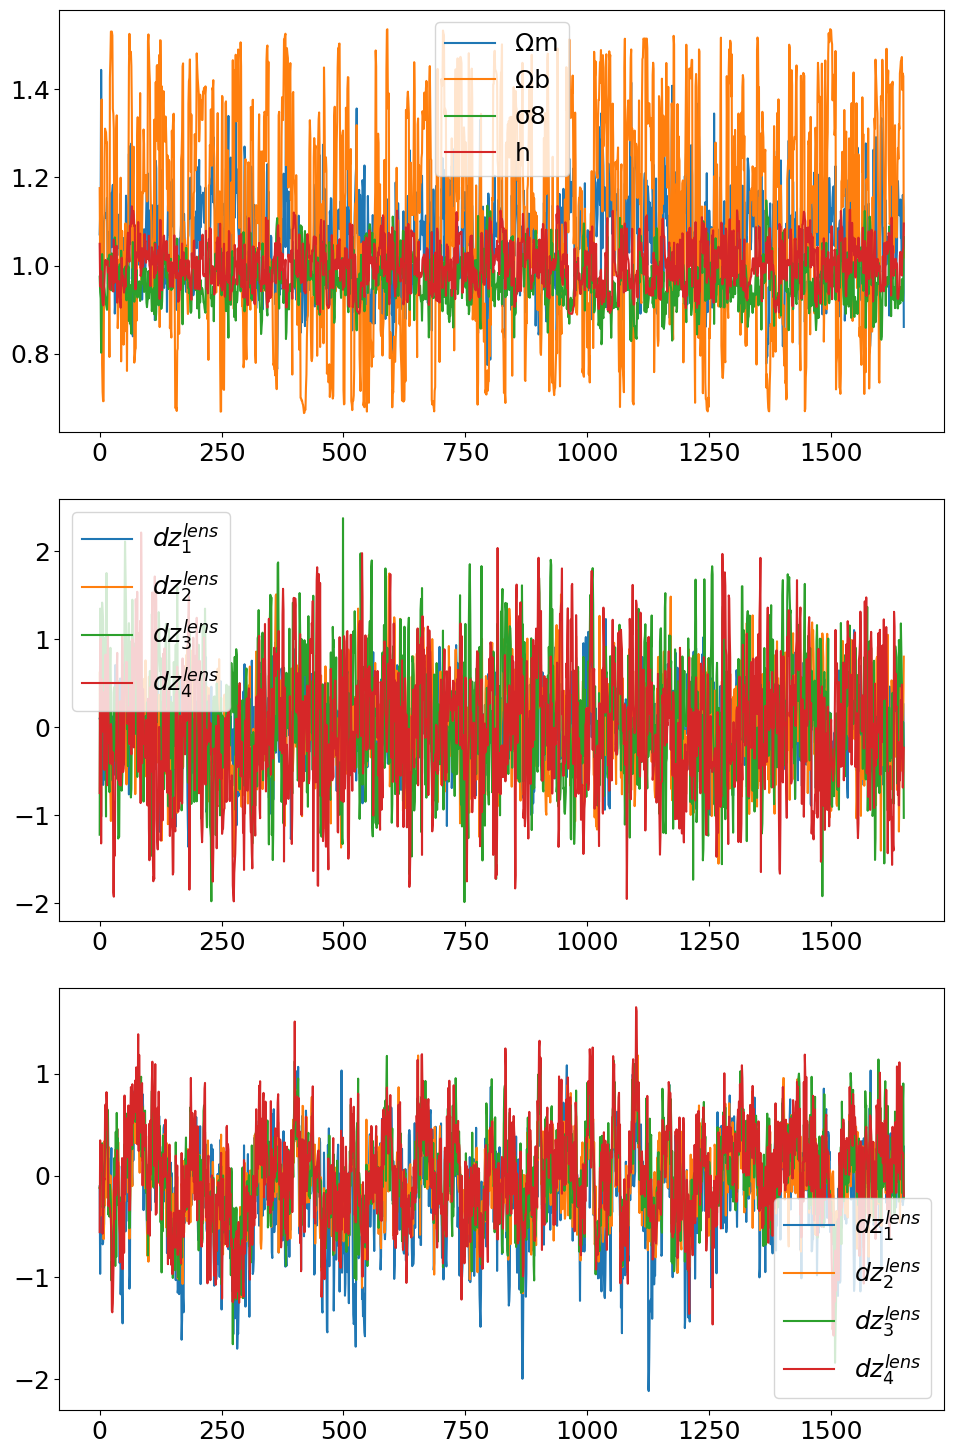

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_dz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{lens}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{lens}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{lens}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{lens}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

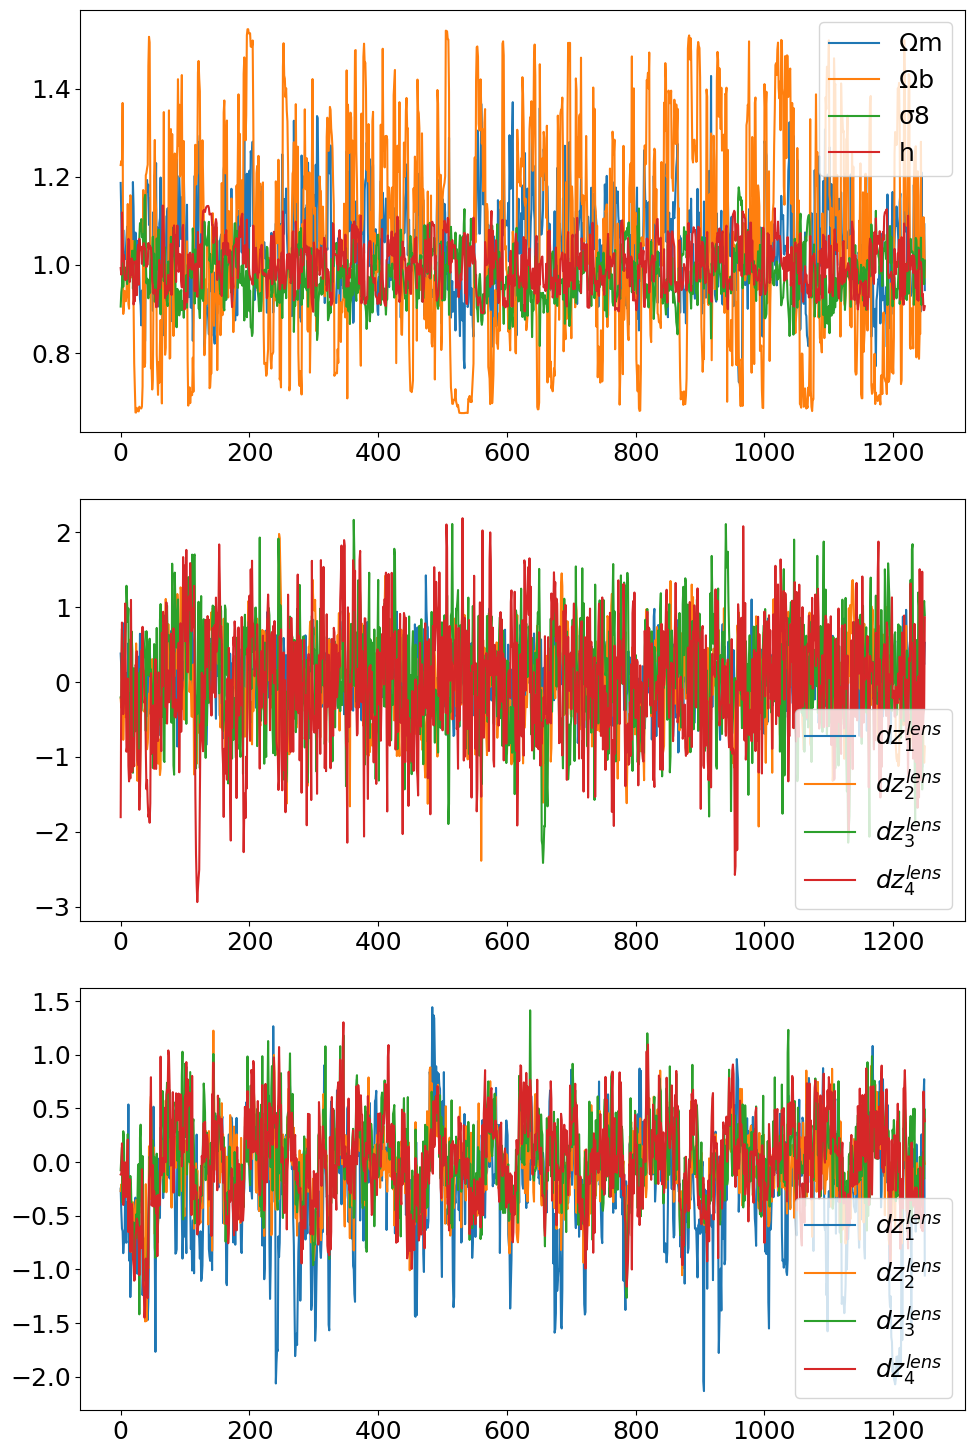

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_wzdz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{lens}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{lens}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{lens}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{lens}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

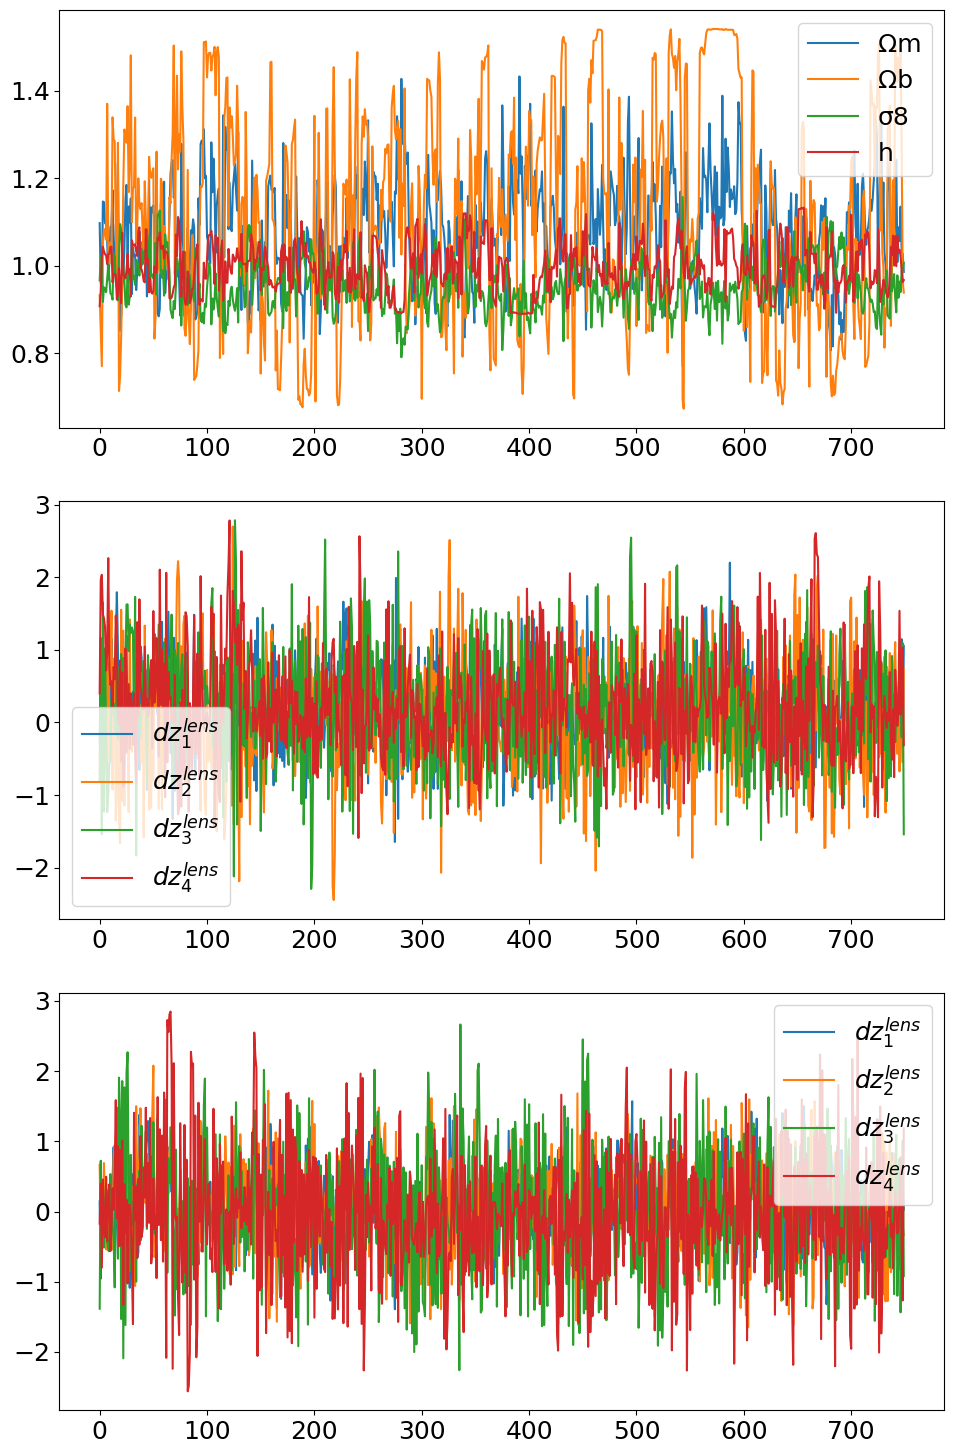

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_gp_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{lens}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{lens}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{lens}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{lens}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

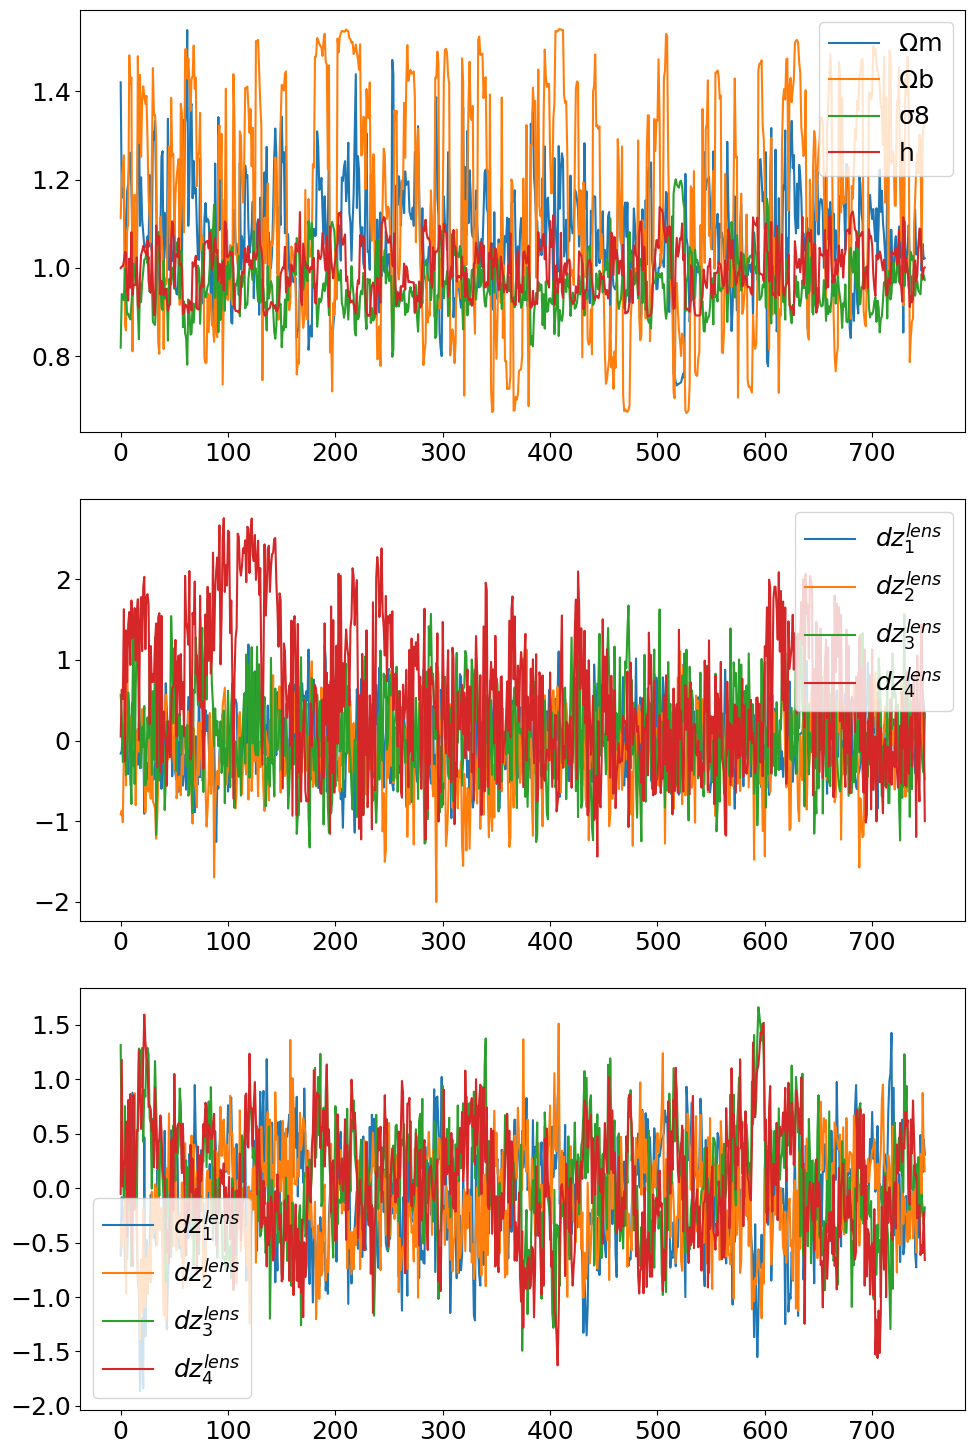

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_PCA_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{lens}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{lens}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{lens}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{lens}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

## Posteriors

In [19]:
labels_dict = {'h': 'h',
               'Ωm': r'\Omega_m',
               'Ωb': r'\Omega_b',
               'ns': 'n_s',
               'σ8': r'\sigma_8',
               'S8': 'S_8',

               'lens_0_b': r'b_{lens}^{0}',
               'lens_1_b': r'b_{lens}^{1}',
               'lens_2_b': r'b_{lens}^{2}',
               'lens_3_b': r'b_{lens}^{3}',
               'lens_4_b': r'b_{lens}^{4}',

               'dz_lens_0': r'\Delta^{0}_{z, lens}',
               'dz_lens_1': r'\Delta^{1}_{z, lens}',
               'dz_lens_2': r'\Delta^{2}_{z, lens}',
               'dz_lens_3': r'\Delta^{3}_{z, lens}',
               'dz_lens_4': r'\Delta^{4}_{z, lens}',
               'dz_source_0': r'\Delta^{0}_{z, source}',
               'dz_source_1': r'\Delta^{1}_{z, source}',
               'dz_source_2': r'\Delta^{2}_{z, source}',
               'dz_source_3': r'\Delta^{3}_{z, source}',
               'dz_source_4': r'\Delta^{4}_{z, source}', 

               'wz_lens_0': r'w^{0}_{z, lens}',
               'wz_lens_1': r'w^{1}_{z, lens}',
               'wz_lens_2': r'w^{2}_{z, lens}',
               'wz_lens_3': r'w^{3}_{z, lens}',
               'wz_lens_4': r'w^{4}_{z, lens}',
               'wz_source_0': r'w^{0}_{z, source}',
               'wz_source_1': r'w^{1}_{z, source}',
               'wz_source_2': r'w^{2}_{z, source}',
               'wz_source_3': r'w^{3}_{z, source}',
               'wz_source_4': r'w^{4}_{z, source}',
               
               'A_IA': 'A_{IA}'}

In [20]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [21]:
samples_wzdz_prior = make_chain(prior_wzdz_chain, r"Prior - $\Delta_z + w_z$ ", labels_dict=labels_dict)

Prior - $\Delta_z + w_z$ 
Removed no burn in


In [22]:
samples_3x2_nuisance_nomarg = make_chain(chain_3x2_nuisance_nomarg, "Fixed")
samples_3x2_nuisance_nomarg_old = make_chain(chain_3x2_nuisance_nomarg_old, "Fixed Old")

Fixed
Removed no burn in
Fixed Old
Removed no burn in


In [23]:
samples_3x2_nuisance_dz_ana = make_chain(chain_3x2_nuisance_dz_ana, r"$\Delta_z$ Analytical")
samples_3x2_nuisance_wzdz_ana = make_chain(chain_3x2_nuisance_wzdz_ana, r"$\Delta_z + w_z$ Analytical")
samples_3x2_nuisance_PCA_ana = make_chain(chain_3x2_nuisance_PCA_ana, r"PCA Analytical")
samples_3x2_nuisance_gp_ana = make_chain(chain_3x2_nuisance_gp_ana, r"GP Analytical")

$\Delta_z$ Analytical
Removed no burn in
$\Delta_z + w_z$ Analytical
Removed no burn in
PCA Analytical
Removed no burn in
GP Analytical
Removed no burn in


In [24]:
samples_3x2_nuisance_dz_num = make_chain(chain_3x2_nuisance_dz_num, r"$\Delta_z$ Numerical")
samples_3x2_nuisance_wzdz_num = make_chain(chain_3x2_nuisance_wzdz_num, r"$\Delta_z + w_z$ Numerical")
samples_3x2_nuisance_PCA_num = make_chain(chain_3x2_nuisance_PCA_num, r"PCA Numerical")#
samples_3x2_nuisance_gp_num = make_chain(chain_3x2_nuisance_gp_num, r"GP Numerical")

$\Delta_z$ Numerical
Removed no burn in
$\Delta_z + w_z$ Numerical
Removed no burn in
PCA Numerical
Removed no burn in
GP Numerical
Removed no burn in


In [25]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021,
               'lens_0_b':0.879118,
               'lens_1_b':1.05894, 
               'lens_2_b':1.22145, 
               'lens_3_b':1.35065, 
               'lens_4_b':1.58909,
               'A_IA':0.25179439}
prat_markers['S8'] = prat_markers['σ8']*np.sqrt(prat_markers['Ωm']/0.3)

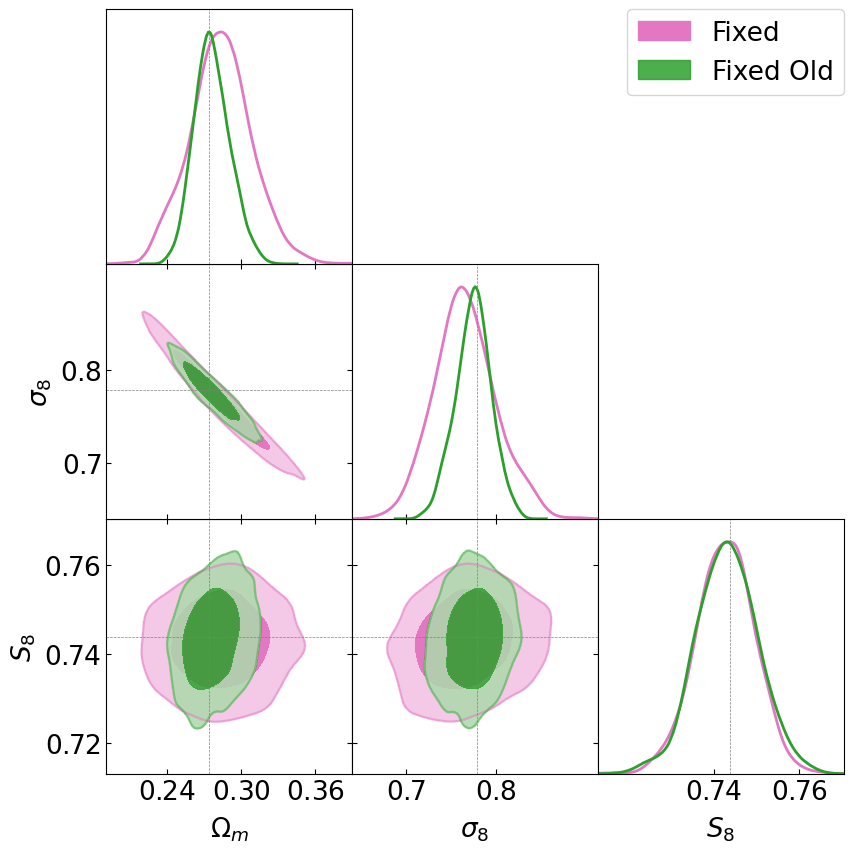

In [26]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_nuisance_nomarg,
    samples_3x2_nuisance_nomarg_old,
    ],
    ['Ωm', 'σ8', 'S8'],
    #'lens_1_b', 'lens_2_b', 'lens_3_b', 'lens_4_b', 'lens_5_b',],
    line_args=[
            {'color':'C6'},
            {'color':'C2'},
            {'color':'C10'},
            {'color':'C3'},
            {'color':'black'}], 
    colors=['C6', 'C2', 'C10', 'C3', "black"],
    #param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.65, 0.9), 'S8':(0.67, 0.8)},
    filled=[True, True, True, True, False],
    contour_ls=['-', '-', '-', '-', '--'], 
    contour_lws=2,
    markers=prat_markers)
g.export("./paper_plots/triangle_comp.pdf")

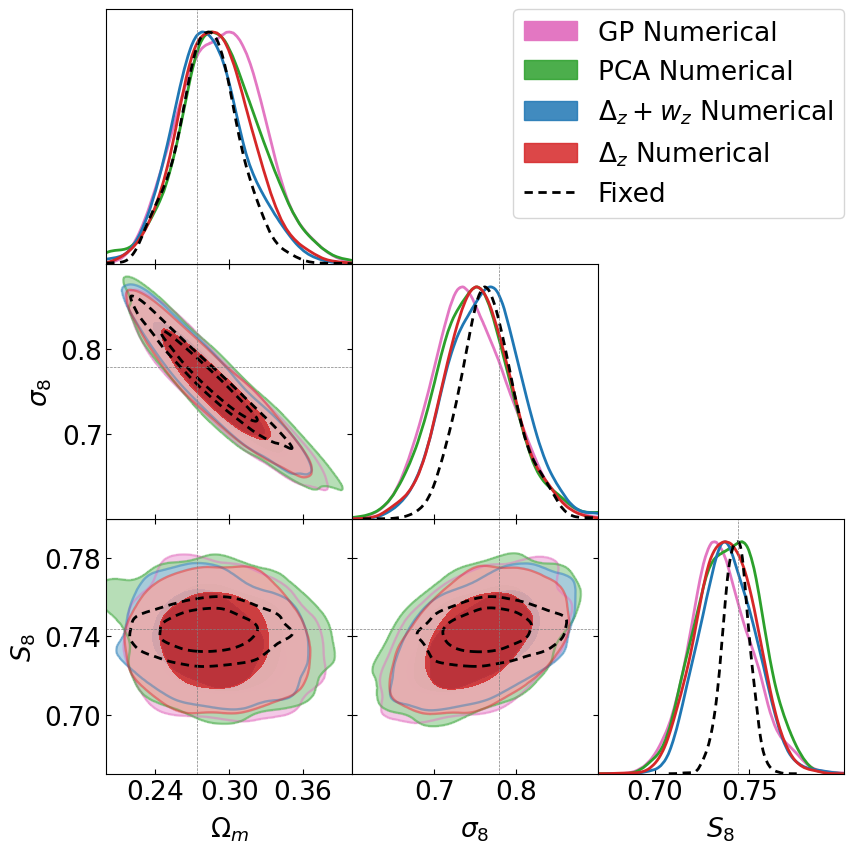

In [27]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_nuisance_gp_num,
    samples_3x2_nuisance_PCA_num,
    samples_3x2_nuisance_wzdz_num,
    samples_3x2_nuisance_dz_num,
    samples_3x2_nuisance_nomarg,
    ],
    ['Ωm', 'σ8', 'S8'],
    #'lens_1_b', 'lens_2_b', 'lens_3_b', 'lens_4_b', 'lens_5_b',],
    line_args=[
            {'color':'C6'},
            {'color':'C2'},
            {'color':'C10'},
            {'color':'C3'},
            {'color':'black'}], 
    colors=['C6', 'C2', 'C10', 'C3', "black"],
    param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.6, 0.9), 'S8':(0.67, 0.8)},
    filled=[True, True, True, True, False],
    contour_ls=['-', '-', '-', '-', '--'], 
    contour_lws=2,
    markers=prat_markers)
g.export("./paper_plots/triangle_comp.pdf")

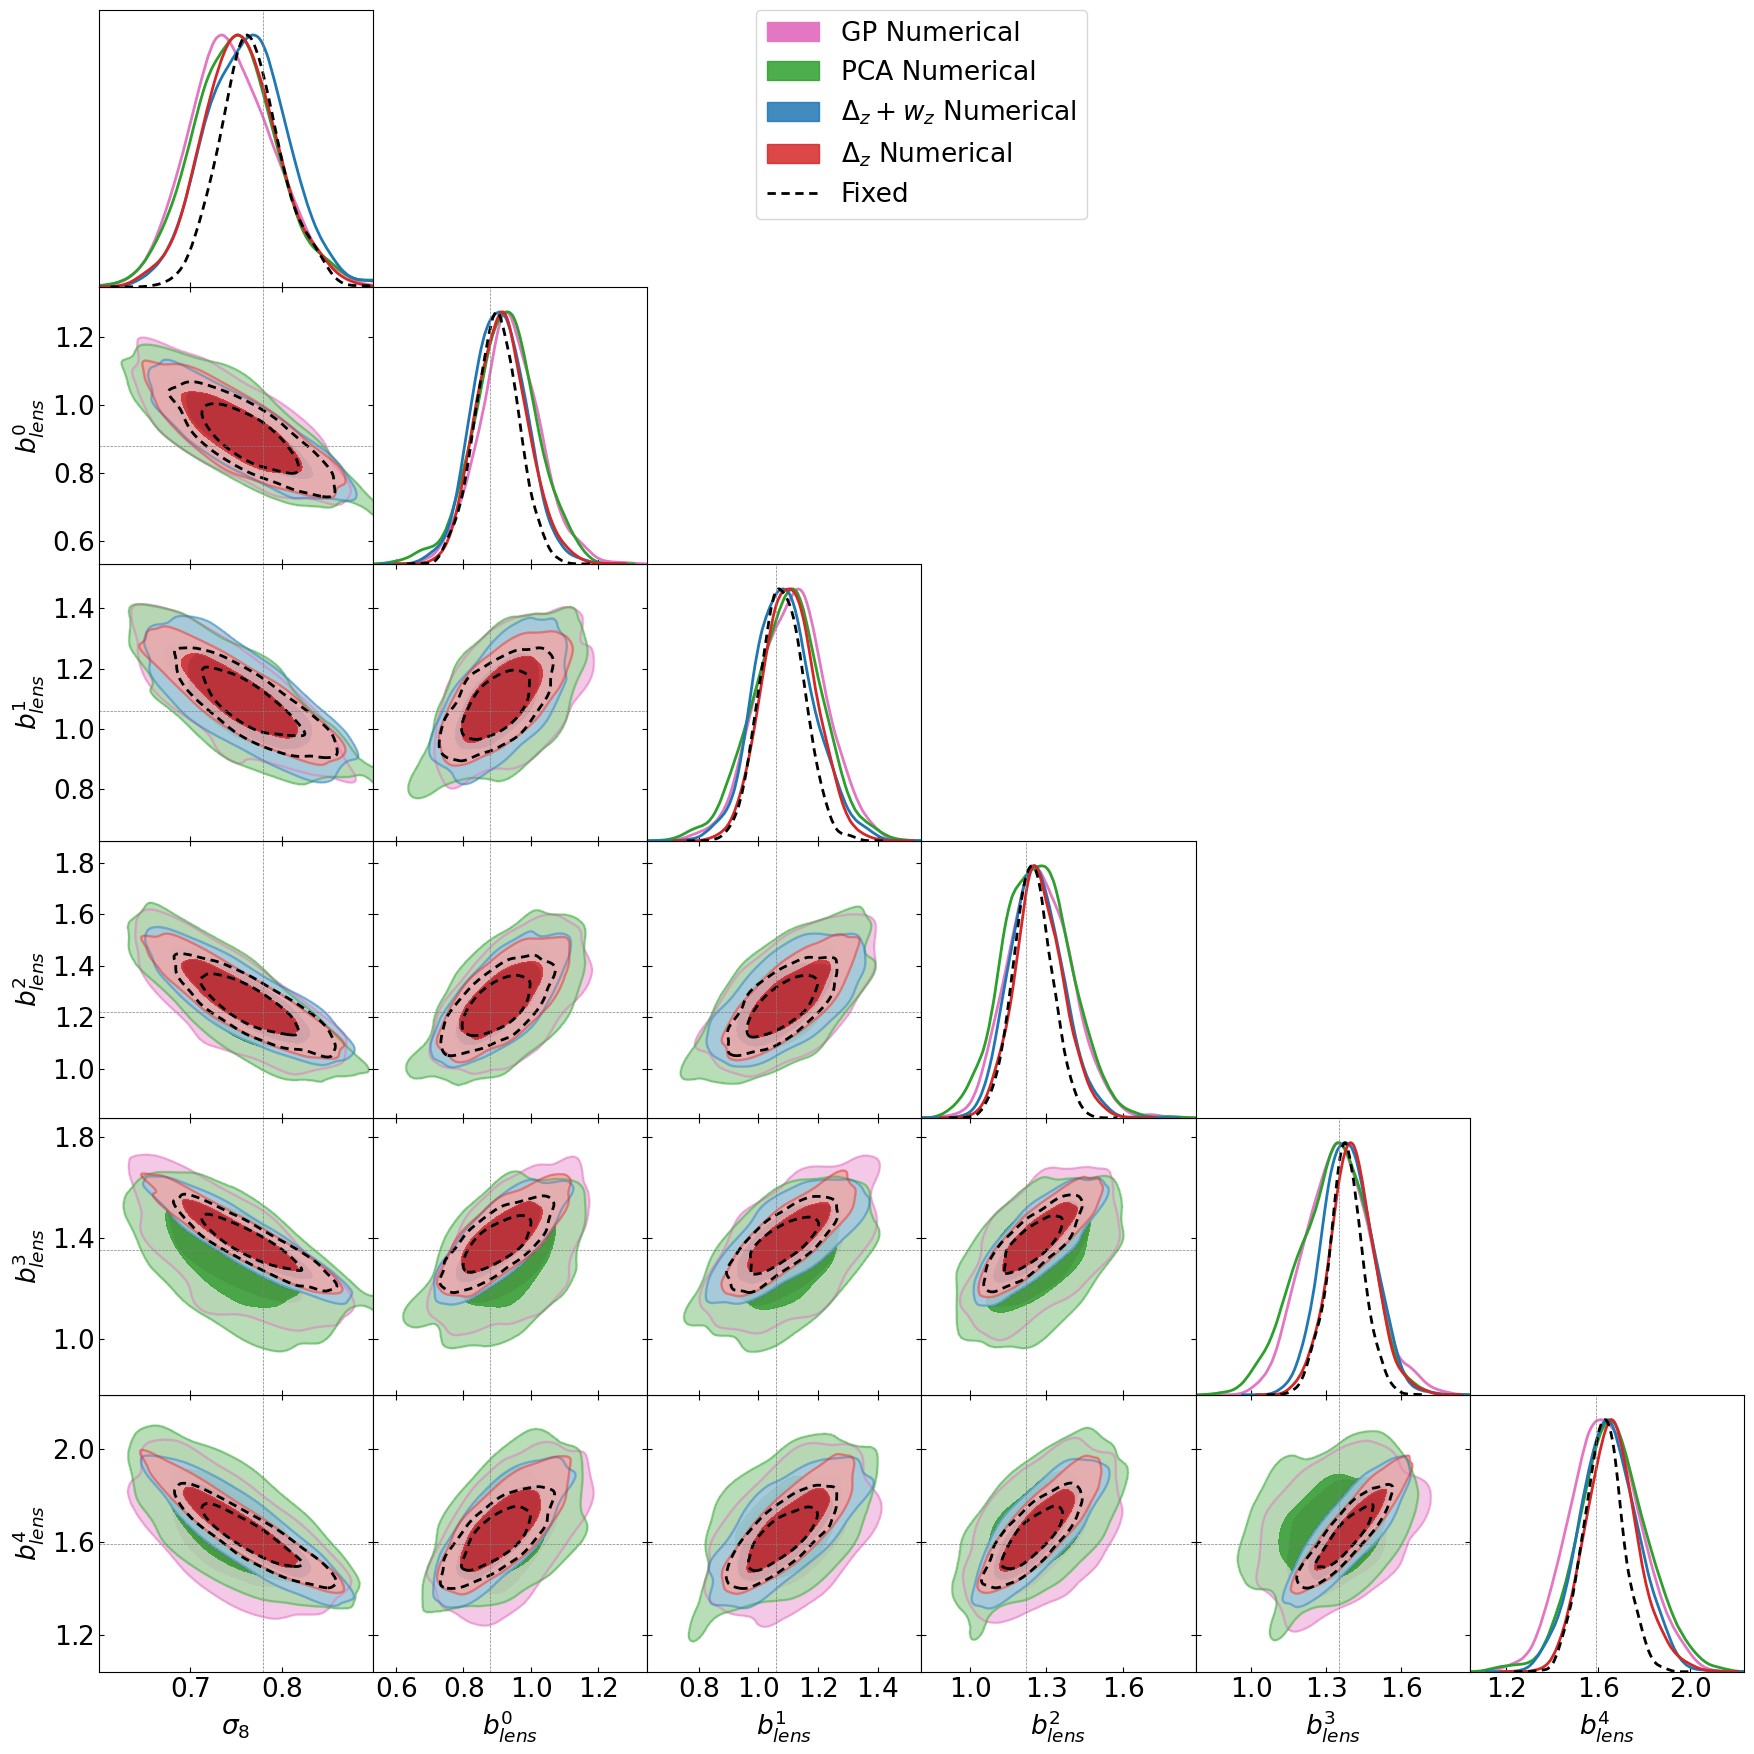

In [28]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_nuisance_gp_num,
    samples_3x2_nuisance_PCA_num,
    samples_3x2_nuisance_wzdz_num,
    samples_3x2_nuisance_dz_num,
    samples_3x2_nuisance_nomarg,
    ],
    ['σ8', 'lens_0_b', 'lens_1_b', 'lens_2_b', 'lens_3_b', 'lens_4_b',],
    line_args=[
            {'color':'C6'},
            {'color':'C2'},
            {'color':'C10'},
            {'color':'C3'},
            {'color':'black'}], 
    colors=['C6', 'C2', 'C10', 'C3', "black"],
    param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.6, 0.9), 'S8':(0.67, 0.8)},
    filled=[True, True, True, True, False],
    contour_ls=['-', '-', '-', '-', '--'], 
    contour_lws=2,
    markers=prat_markers)
g.export("./paper_plots/triangle_comp.pdf")

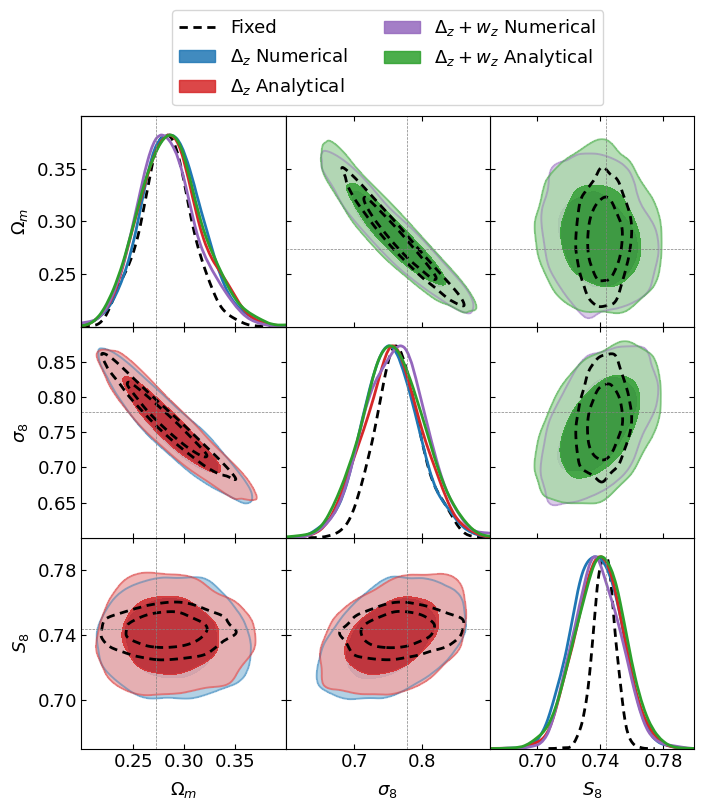

In [29]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                samples_3x2_nuisance_dz_num,
                samples_3x2_nuisance_dz_ana,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_wzdz_num,
                                samples_3x2_nuisance_wzdz_ana,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.6, 0.9), 'S8':(0.67, 0.8)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/triangle_1.pdf")

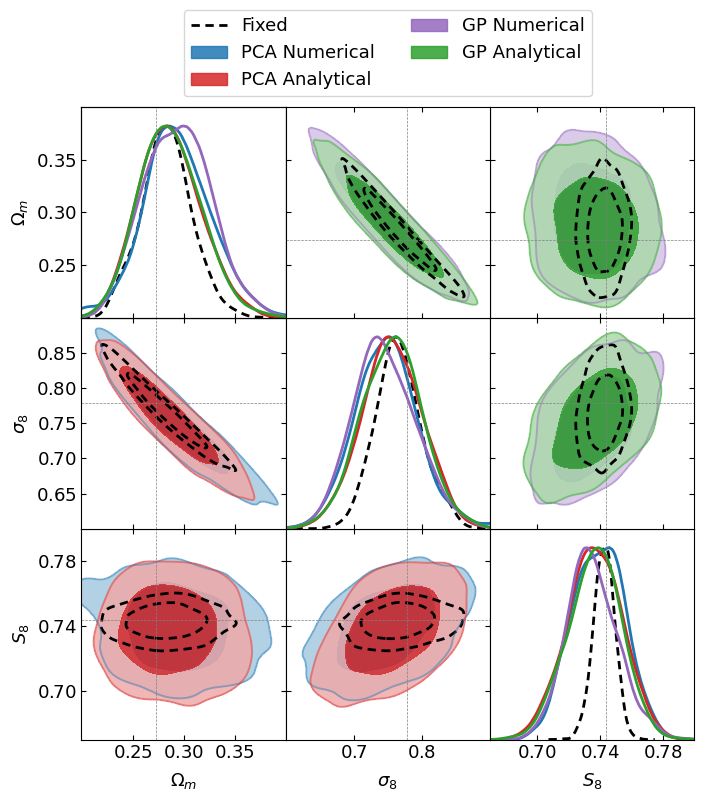

In [30]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                 samples_3x2_nuisance_PCA_num,
                 samples_3x2_nuisance_PCA_ana,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_gp_num,
                                samples_3x2_nuisance_gp_ana,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.6, 0.9), 'S8':(0.67, 0.8)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/triangle_2.pdf")

In [31]:
def make_table(params):
    for param in params:
        if param == "S8":
            param_nomarg = chain_3x2_nuisance_nomarg["σ8"] * np.sqrt(chain_3x2_nuisance_nomarg["Ωm"] / 0.3)
            param_dz_ana = chain_3x2_nuisance_dz_ana["σ8"] * np.sqrt(chain_3x2_nuisance_dz_ana["Ωm"] / 0.3)
            param_wzdz_ana = chain_3x2_nuisance_wzdz_ana["σ8"] * np.sqrt(chain_3x2_nuisance_wzdz_ana["Ωm"] / 0.3)
            param_PCA_ana = chain_3x2_nuisance_PCA_ana["σ8"] * np.sqrt(chain_3x2_nuisance_PCA_ana["Ωm"] / 0.3)
            param_gp_ana = chain_3x2_nuisance_gp_ana["σ8"] * np.sqrt(chain_3x2_nuisance_gp_ana["Ωm"] / 0.3)
            param_dz_num = chain_3x2_nuisance_dz_num["σ8"] * np.sqrt(chain_3x2_nuisance_dz_num["Ωm"] / 0.3)
            param_wzdz_num = chain_3x2_nuisance_wzdz_num["σ8"] * np.sqrt(chain_3x2_nuisance_wzdz_num["Ωm"] / 0.3) 
            param_PCA_num = chain_3x2_nuisance_PCA_num["σ8"] * np.sqrt(chain_3x2_nuisance_PCA_num["Ωm"] / 0.3)
            param_gp_num = chain_3x2_nuisance_gp_num["σ8"]  * np.sqrt(chain_3x2_nuisance_gp_num["Ωm"] / 0.3)
        else:
            param_nomarg = chain_3x2_nuisance_nomarg[param]
            param_dz_ana = chain_3x2_nuisance_dz_ana[param]
            param_wzdz_ana = chain_3x2_nuisance_wzdz_ana[param]
            param_PCA_ana = chain_3x2_nuisance_PCA_ana[param]
            param_gp_ana = chain_3x2_nuisance_gp_ana[param]
            param_dz_num = chain_3x2_nuisance_dz_num[param]
            param_wzdz_num = chain_3x2_nuisance_wzdz_num[param]
            param_PCA_num = chain_3x2_nuisance_PCA_num[param]
            param_gp_num = chain_3x2_nuisance_gp_num[param]

        print("$", labels_dict[param], "$",
            "&", np.round(np.mean(param_nomarg),3), "$\pm$", np.round(np.std(param_nomarg),3),
            "&", np.round(np.mean(param_dz_ana),3), "$\pm$", np.round(np.std(param_dz_ana),3),
            "&", np.round(np.mean(param_wzdz_ana),3), "$\pm$", np.round(np.std(param_wzdz_ana),3),
            "&", np.round(np.mean(param_PCA_ana),3), "$\pm$", np.round(np.std(param_PCA_ana),3),
            "&", np.round(np.mean(param_gp_ana),3), "$\pm$", np.round(np.std(param_gp_ana),3),
            "&", np.round(np.mean(param_dz_num),3), "$\pm$", np.round(np.std(param_dz_num),3),
            "&", np.round(np.mean(param_wzdz_num),3), "$\pm$", np.round(np.std(param_wzdz_num),3),
            "&", np.round(np.mean(param_PCA_num),3), "$\pm$", np.round(np.std(param_PCA_num),3),
            "&", np.round(np.mean(param_gp_num),3), "$\pm$", np.round(np.std(param_gp_num),3),
            "\\\\")



<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_38029/1762333271.py:25: SyntaxWarning: invalid escape sequence '\p'

In [32]:
make_table(["Ωm", "σ8", "S8", "Ωb", "h", "ns", "A_IA", "lens_0_b", "lens_1_b", "lens_2_b", "lens_3_b", "lens_4_b"])

$ \Omega_m $ & 0.283 $\pm$ 0.025 & 0.288 $\pm$ 0.03 & 0.288 $\pm$ 0.031 & 0.287 $\pm$ 0.03 & 0.287 $\pm$ 0.03 & 0.289 $\pm$ 0.029 & 0.284 $\pm$ 0.029 & 0.294 $\pm$ 0.034 & 0.294 $\pm$ 0.032 \\
$ \sigma_8 $ & 0.766 $\pm$ 0.034 & 0.758 $\pm$ 0.042 & 0.758 $\pm$ 0.045 & 0.757 $\pm$ 0.044 & 0.756 $\pm$ 0.044 & 0.754 $\pm$ 0.041 & 0.762 $\pm$ 0.044 & 0.751 $\pm$ 0.049 & 0.746 $\pm$ 0.045 \\
$ S_8 $ & 0.743 $\pm$ 0.007 & 0.74 $\pm$ 0.015 & 0.74 $\pm$ 0.015 & 0.737 $\pm$ 0.017 & 0.737 $\pm$ 0.017 & 0.738 $\pm$ 0.015 & 0.739 $\pm$ 0.014 & 0.739 $\pm$ 0.016 & 0.736 $\pm$ 0.016 \\
$ \Omega_b $ & 0.046 $\pm$ 0.01 & 0.046 $\pm$ 0.011 & 0.046 $\pm$ 0.01 & 0.046 $\pm$ 0.01 & 0.046 $\pm$ 0.01 & 0.047 $\pm$ 0.01 & 0.045 $\pm$ 0.01 & 0.048 $\pm$ 0.01 & 0.047 $\pm$ 0.01 \\
$ h $ & 0.722 $\pm$ 0.042 & 0.721 $\pm$ 0.039 & 0.72 $\pm$ 0.039 & 0.724 $\pm$ 0.04 & 0.723 $\pm$ 0.042 & 0.72 $\pm$ 0.038 & 0.719 $\pm$ 0.04 & 0.716 $\pm$ 0.043 & 0.716 $\pm$ 0.04 \\
$ n_s $ & 1.001 $\pm$ 0.047 & 1.001 $\pm$ 0.048 & 

dz - fixed 0.19225903475772643
dz - wzddz 0.017569172420867318
dz - PCA 0.1258361934139772
dz - gp 0.13303851178434148


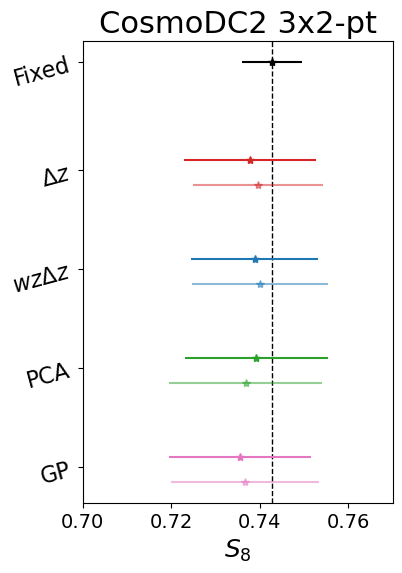

In [33]:
fig=plt.figure(figsize=(4,6))
my_yticks = ['Fixed', r'$\Delta z$',  r'$wz \Delta z$', 'PCA', 'GP']

label = r'$S_{\rm{8}}$'
p_fixed = chain_3x2_nuisance_nomarg["σ8"] * np.sqrt(chain_3x2_nuisance_nomarg["Ωm"] / 0.3)
p_fixed_m, p_fixed_s = np.mean(p_fixed), np.std(p_fixed)
plt.errorbar(p_fixed_m, 0, xerr=np.transpose(p_fixed_s), color='k', fmt='*')
plt.axvline(p_fixed_m, ls='--', color='k', lw=1)

p_dz = chain_3x2_nuisance_dz_num["σ8"] * np.sqrt(chain_3x2_nuisance_dz_num["Ωm"] / 0.3)
p_dz_m, p_dz_s = np.mean(p_dz), np.std(p_dz)
plt.errorbar(p_dz_m, 2, xerr=np.transpose(p_dz_s), color="C3", fmt='*')
p_dz = chain_3x2_nuisance_dz_ana["σ8"] * np.sqrt(chain_3x2_nuisance_dz_ana["Ωm"] / 0.3)
p_dz_m, p_dz_s = np.mean(p_dz), np.std(p_dz)
plt.errorbar(p_dz_m, 2.5, xerr=np.transpose(p_dz_s), color="C3", fmt='*', alpha=0.5)

p_wzdz = chain_3x2_nuisance_wzdz_num["σ8"] * np.sqrt(chain_3x2_nuisance_wzdz_num["Ωm"] / 0.3)
p_wzdz_m, p_wzdz_s = np.mean(p_wzdz), np.std(p_wzdz)
plt.errorbar(p_wzdz_m, 4, xerr=np.transpose(p_wzdz_s), color="C10", fmt='*')
p_wzdz = chain_3x2_nuisance_wzdz_ana["σ8"] * np.sqrt(chain_3x2_nuisance_wzdz_ana["Ωm"] / 0.3)
p_wzdz_m, p_wzdz_s = np.mean(p_wzdz), np.std(p_wzdz)
plt.errorbar(p_wzdz_m, 4.5, xerr=np.transpose(p_wzdz_s), color="C10",  fmt='*', alpha=0.5)

p_PCA = chain_3x2_nuisance_PCA_num["σ8"] * np.sqrt(chain_3x2_nuisance_PCA_num["Ωm"] / 0.3)
p_PCA_m, p_PCA_s = np.mean(p_PCA), np.std(p_PCA)
plt.errorbar(p_PCA_m, 6, xerr=np.transpose(p_PCA_s), color="C2",  fmt='*')
p_PCA = chain_3x2_nuisance_PCA_ana["σ8"] * np.sqrt(chain_3x2_nuisance_PCA_ana["Ωm"] / 0.3)
p_PCA_m, p_PCA_s = np.mean(p_PCA), np.std(p_PCA)
plt.errorbar(p_PCA_m, 6.5, xerr=np.transpose(p_PCA_s), color="C2", fmt='*', alpha=0.5)

p_gp = chain_3x2_nuisance_gp_num["σ8"] * np.sqrt(chain_3x2_nuisance_gp_num["Ωm"] / 0.3)
p_gp_m, p_gp_s = np.mean(p_gp), np.std(p_gp)
plt.errorbar(p_gp_m, 8, xerr=np.transpose(p_gp_s), color="C6", fmt='*')
p_gp = chain_3x2_nuisance_gp_ana["σ8"] * np.sqrt(chain_3x2_nuisance_gp_ana["Ωm"] / 0.3)
p_gp_m, p_gp_s = np.mean(p_gp), np.std(p_gp)
plt.errorbar(p_gp_m, 8.5, xerr=np.transpose(p_gp_s), color="C6", fmt='*', alpha=0.5)

diff_fixed_dz = np.abs(p_fixed_m - p_dz_m)/np.sqrt(p_fixed_s**2 + p_dz_s**2)
diff_dz_wzddz = np.abs(p_dz_m - p_wzdz_m)/np.sqrt(p_dz_s**2 + p_wzdz_s**2)
diff_dz_PCA = np.abs(p_dz_m - p_PCA_m)/np.sqrt(p_dz_s**2 + p_PCA_s**2)
diff_dz_gp = np.abs(p_dz_m - p_gp_m)/np.sqrt(p_dz_s**2 + p_gp_s**2)
print("dz - fixed", diff_fixed_dz)
print("dz - wzddz", diff_dz_wzddz)
print("dz - PCA", diff_dz_PCA)
print("dz - gp", diff_dz_gp)

plt.yticks([0, 2.2, 4.2, 6.2, 8.2], my_yticks, fontsize=16)
plt.xlim(0.7, 0.77)
plt.xlabel(label, fontsize=18)
plt.yticks(rotation=15)
plt.xticks(fontsize=14)
plt.gca().invert_yaxis()
plt.title("CosmoDC2 3x2-pt")

plt.savefig("./paper_plots/S8_comp.pdf", bbox_inches='tight', pad_inches=0)

In [34]:
samples_3x2_nuisance_wzdz_num.getCov()

array([[ 8.33414685e-04,  1.49484453e-04, -3.51276992e-04, ...,
         2.43241630e-04,  1.24796452e-04, -6.73883138e-05],
       [ 1.49484453e-04,  1.06080676e-04,  2.12267227e-05, ...,
         7.55605296e-05,  3.57165071e-05, -1.98460436e-05],
       [-3.51276992e-04,  2.12267227e-05,  1.61731752e-03, ...,
        -4.84573151e-05, -1.93712763e-05, -1.99092668e-05],
       ...,
       [ 2.43241630e-04,  7.55605296e-05, -4.84573151e-05, ...,
         1.33445820e-03,  7.52189810e-04, -4.47725124e-04],
       [ 1.24796452e-04,  3.57165071e-05, -1.93712763e-05, ...,
         7.52189810e-04,  2.72306786e-03, -2.89619494e-04],
       [-6.73883138e-05, -1.98460436e-05, -1.99092668e-05, ...,
        -4.47725124e-04, -2.89619494e-04,  2.06964495e-04]])

## Shifts and Widths

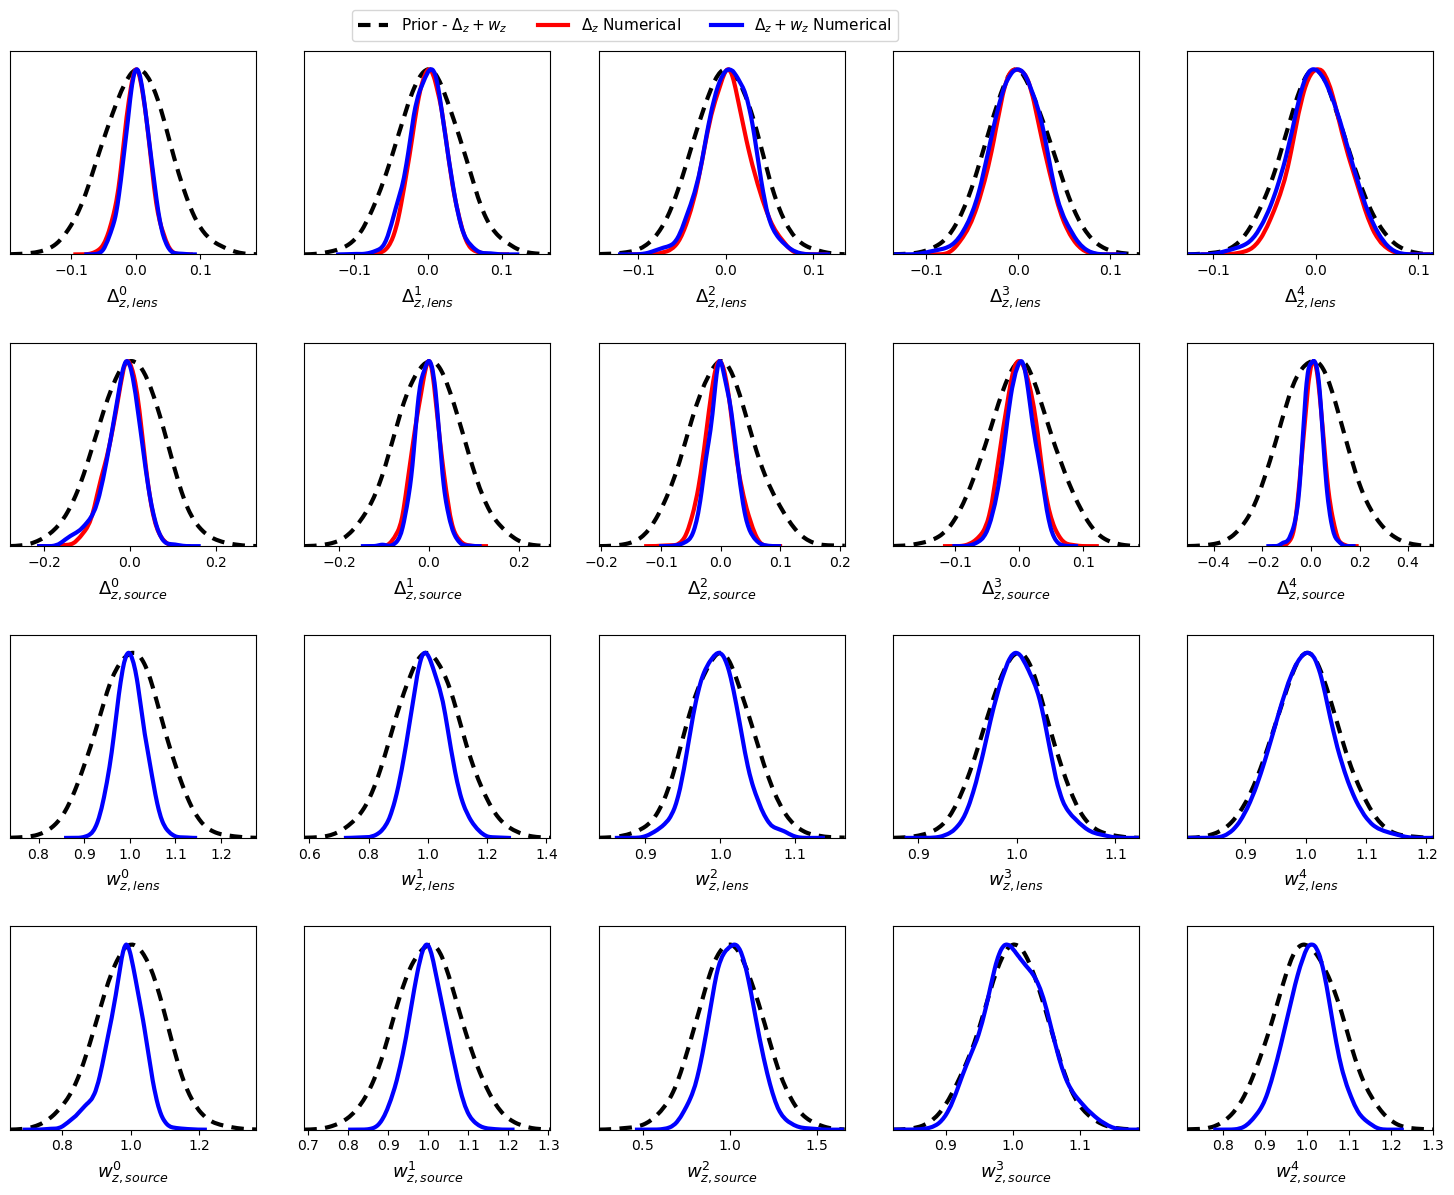

In [35]:
g = plots.get_subplot_plotter(width_inch=15)
g.plots_1d([samples_wzdz_prior,
            samples_3x2_nuisance_dz_num,
            samples_3x2_nuisance_wzdz_num
            ], 
           ['dz_lens_0', 'dz_lens_1', 'dz_lens_2', 'dz_lens_3', 'dz_lens_4',
            'dz_source_0', 'dz_source_1', 'dz_source_2', 'dz_source_3', 'dz_source_4',
            'wz_lens_0', 'wz_lens_1', 'wz_lens_2', 'wz_lens_3', 'wz_lens_4',
            'wz_source_0', 'wz_source_1', 'wz_source_2', 'wz_source_3', 'wz_source_4'],
            lws=3, ls=['--', '-', '-'], nx=5, legend_ncol=3);

g.export("./paper_plots/wzdz.pdf")

## Nzs

In [36]:
import nz_prior as nzp


nz_path = "./data/CosmoDC2/image_gp_bpz_priors/"
nzs = {
"lens_0": np.load(nz_path+"gp_lens_0.npz"),
"lens_1": np.load(nz_path+"gp_lens_1.npz"),
"lens_2": np.load(nz_path+"gp_lens_2.npz"),
"lens_3": np.load(nz_path+"gp_lens_3.npz"),
"lens_4": np.load(nz_path+"gp_lens_4.npz"),
"source_0": np.load(nz_path+"gp_source_0.npz"),
"source_1": np.load(nz_path+"gp_source_1.npz"),
"source_2": np.load(nz_path+"gp_source_2.npz"),
"source_3": np.load(nz_path+"gp_source_3.npz"),
"source_4": np.load(nz_path+"gp_source_4.npz"),
}
gp_nzs = {}
chain = chain_3x2_nuisance_gp_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    W = nz["W"] 
    _, n = W.shape
    param_names = ["alphas_"+tracer_name+"[{}]".format(i) for i in range(1, 5+1)]
    alphas = [chain_3x2_nuisance_gp_num[param_name].values for param_name in param_names]
    alphas = np.array(alphas).T
    n_samples = alphas.shape[0]
    _nzs = [nz_mean + np.dot(W, alphas[i, :]) for i in range(n_samples)]
    gp_nzs[tracer_name] = _nzs

In [37]:
nz_path = "./data/CosmoDC2/image_PCA_bpz_priors/"
nzs = {
"lens_0": np.load(nz_path+"PCA_lens_0.npz"),
"lens_1": np.load(nz_path+"PCA_lens_1.npz"),
"lens_2": np.load(nz_path+"PCA_lens_2.npz"),
"lens_3": np.load(nz_path+"PCA_lens_3.npz"),
"lens_4": np.load(nz_path+"PCA_lens_4.npz"),
"source_0": np.load(nz_path+"PCA_source_0.npz"),
"source_1": np.load(nz_path+"PCA_source_1.npz"),
"source_2": np.load(nz_path+"PCA_source_2.npz"),
"source_3": np.load(nz_path+"PCA_source_3.npz"),
"source_4": np.load(nz_path+"PCA_source_4.npz"),
}
pca_nzs = {}
chain = chain_3x2_nuisance_PCA_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    W = nz["W"] 
    _, n = W.shape
    param_names = ["alphas_"+tracer_name+"[{}]".format(i) for i in range(1, 5+1)]
    alphas = [chain[param_name].values for param_name in param_names]
    alphas = np.array(alphas).T
    n_samples = alphas.shape[0]
    _nzs = [nz_mean + np.dot(W, alphas[i, :]) for i in range(n_samples)]
    pca_nzs[tracer_name] = _nzs

In [38]:
SnWs_nzs = {}
SnWs_zs = {}
dz_path = "./data/CosmoDC2/image_wzdz_bpz_priors/wzdz_prior.npz"
mean_zs = {}
for tracer in list(nzs.keys()):
    mu = np.average(nzs[tracer]["z"], weights=nzs[tracer]["dndz"])
    mean_zs[tracer] = mu
chain = chain_3x2_nuisance_wzdz_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    dzs = chain["dz_lens_{}".format(int(tracer_name[-1]))].values
    wzs = chain["wz_lens_{}".format(int(tracer_name[-1]))].values
    print(tracer_name, "dzs", np.round(np.std(dzs), 4), "wzs", np.round(np.std(wzs), 4))
    mu = mean_zs[tracer_name]
    n_samples = dz.shape[0]
    _zs = [(z-mu+dzs[i])/wzs[i] + mu for i in range(n_samples)]
    _nzs = [np.interp(_z, z, nz_mean) for _z in _zs]
    SnWs_zs[tracer_name] = _zs
    SnWs_nzs[tracer_name] = _nzs

source_0 dzs 0.0185 wzs 0.0311
source_1 dzs 0.0238 wzs 0.0618
source_2 dzs 0.0257 wzs 0.0301
source_3 dzs 0.0277 wzs 0.0259
source_4 dzs 0.0274 wzs 0.0468
lens_0 dzs 0.0185 wzs 0.0311
lens_1 dzs 0.0238 wzs 0.0618
lens_2 dzs 0.0257 wzs 0.0301
lens_3 dzs 0.0277 wzs 0.0259
lens_4 dzs 0.0274 wzs 0.0468


In [39]:
shifts_nzs = {}
shifts_zs = {}
dz_path = "./data/CosmoDC2/image_dz_bpz_priors/dz_prior.npz"
chain = chain_3x2_nuisance_dz_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    dzs = chain["dz_lens_{}".format(int(tracer_name[-1]))].values
    print(tracer_name, "dzs", np.round(np.std(dzs), 4))
    mu = mean_zs[tracer_name]
    n_samples = dz.shape[0]
    _zs = [z + dzs[i] for i in range(n_samples)]
    _nzs = [np.interp(_z, z, nz_mean) for _z in _zs]
    shifts_zs[tracer_name] = _zs
    shifts_nzs[tracer_name] = _nzs

source_0 dzs 0.0196
source_1 dzs 0.0215
source_2 dzs 0.0246
source_3 dzs 0.0252
source_4 dzs 0.0245
lens_0 dzs 0.0196
lens_1 dzs 0.0215
lens_2 dzs 0.0246
lens_3 dzs 0.0252
lens_4 dzs 0.0245


In [40]:
path = "/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_bpz"
data_nzs = {
"lens_0": np.load(path+"/lens_0.npz")["photo_hists"]/np.sum(np.load(path+"/lens_0.npz")["photo_hists"], axis=0),
"lens_1": np.load(path+"/lens_1.npz")["photo_hists"]/np.sum(np.load(path+"/lens_1.npz")["photo_hists"], axis=0),
"lens_2": np.load(path+"/lens_2.npz")["photo_hists"]/np.sum(np.load(path+"/lens_2.npz")["photo_hists"], axis=0),
"lens_3": np.load(path+"/lens_3.npz")["photo_hists"]/np.sum(np.load(path+"/lens_3.npz")["photo_hists"], axis=0),
"lens_4": np.load(path+"/lens_4.npz")["photo_hists"]/np.sum(np.load(path+"/lens_4.npz")["photo_hists"], axis=0),
"source_0": np.load(path+"/shear_0.npz")["photo_hists"]/np.sum(np.load(path+"/shear_0.npz")["photo_hists"], axis=0),
"source_1": np.load(path+"/shear_1.npz")["photo_hists"]/np.sum(np.load(path+"/shear_0.npz")["photo_hists"], axis=0),
"source_2": np.load(path+"/shear_2.npz")["photo_hists"]/np.sum(np.load(path+"/shear_0.npz")["photo_hists"], axis=0),
"source_3": np.load(path+"/shear_3.npz")["photo_hists"]/np.sum(np.load(path+"/shear_0.npz")["photo_hists"], axis=0),
"source_4": np.load(path+"/shear_4.npz")["photo_hists"]/np.sum(np.load(path+"/shear_0.npz")["photo_hists"], axis=0),
}

====
lens_0 dz:  0.0017 wzdz:  0.0016 PCA:  0.003 GP:  0.0028 Data:  0.0057
====
lens_1 dz:  0.0014 wzdz:  0.0014 PCA:  0.0026 GP:  0.0025 Data:  0.0042
====
lens_2 dz:  0.0028 wzdz:  0.002 PCA:  0.0027 GP:  0.0027 Data:  0.0039
====
lens_3 dz:  0.0023 wzdz:  0.0028 PCA:  0.0043 GP:  0.0037 Data:  0.0043
====
lens_4 dz:  0.0019 wzdz:  0.002 PCA:  0.0028 GP:  0.0033 Data:  0.0035
====
source_0 dz:  0.0011 wzdz:  0.0012 PCA:  0.0029 GP:  0.0027 Data:  0.0042
====
source_1 dz:  0.0014 wzdz:  0.0016 PCA:  0.004 GP:  0.0039 Data:  0.0062
====
source_2 dz:  0.0037 wzdz:  0.0029 PCA:  0.0032 GP:  0.0031 Data:  0.0045
====
source_3 dz:  0.0079 wzdz:  0.0081 PCA:  0.0081 GP:  0.008 Data:  0.0066
====
source_4 dz:  0.0175 wzdz:  0.0177 PCA:  0.0177 GP:  0.0177 Data:  0.0112


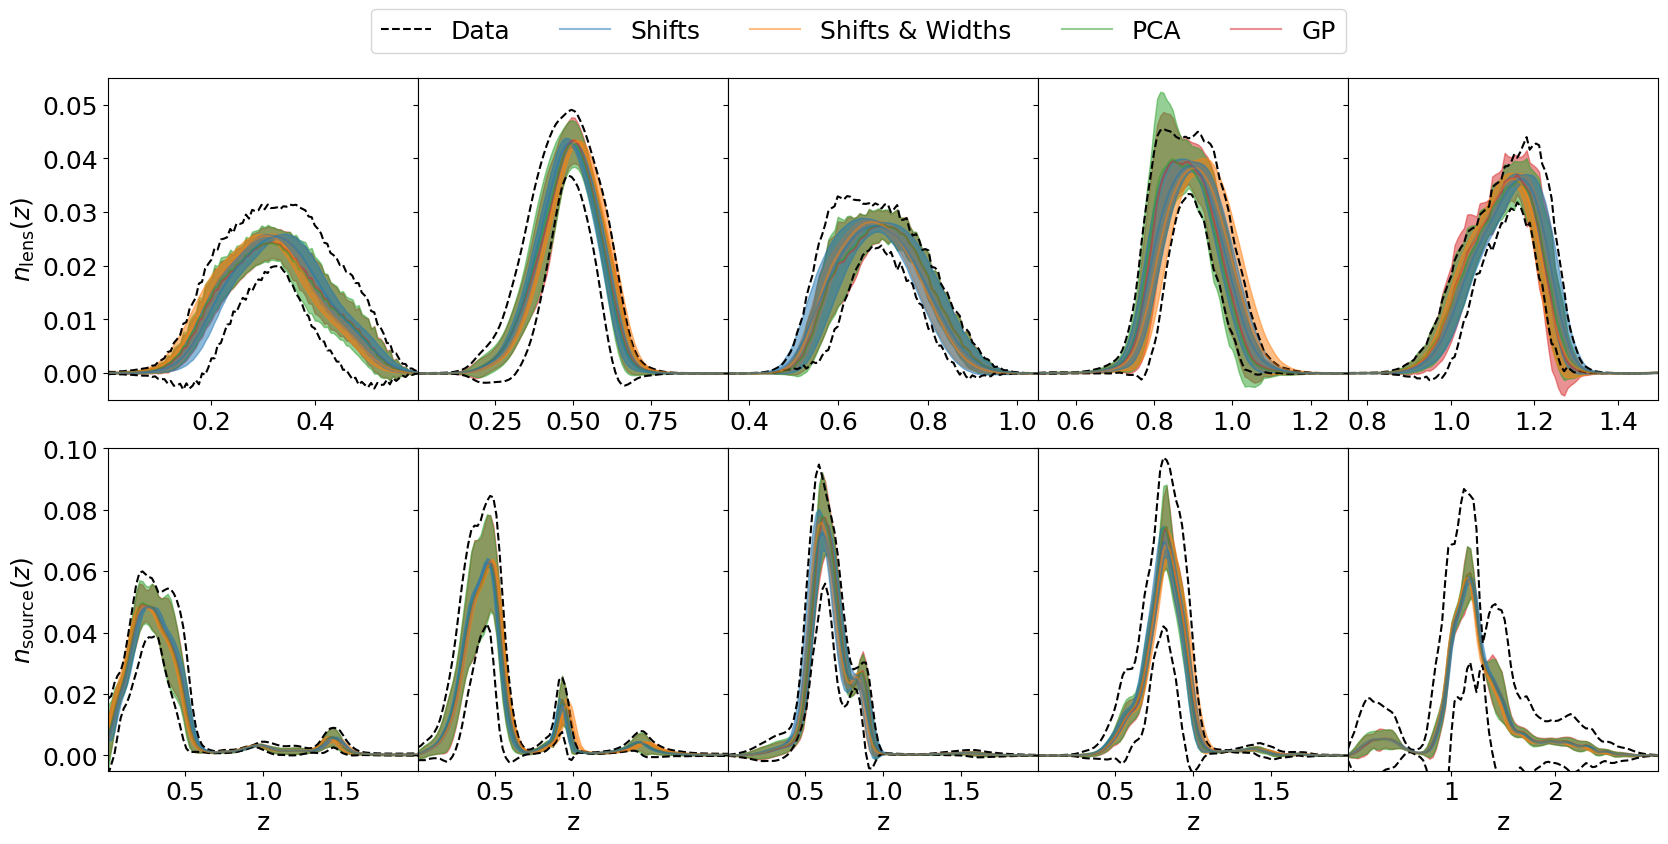

In [41]:
figure, axis = plt.subplots(2, 5, figsize=(5*4,9))
figure.subplots_adjust(wspace=0, hspace=0.15)
lens_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
for i, t in enumerate(lens_tracers):
    line0=axis[0, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)-np.std(data_nzs[t], axis=1), 
                ls="--", color="k")
    axis[0, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)+np.std(data_nzs[t], axis=1), 
                ls="--", color="k")
    
    line4=axis[0, i].plot(nzs[t]["z"],
                np.mean(gp_nzs[t], axis=0), 
                alpha=0.5, color="C3",
                label="GP")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(gp_nzs[t], axis=0)-np.std(gp_nzs[t], axis=0), 
                    np.mean(gp_nzs[t], axis=0)+np.std(gp_nzs[t], axis=0), 
                    alpha=0.5, color="C3")
    
    line3=axis[0, i].plot(nzs[t]["z"],
                np.mean(pca_nzs[t], axis=0), 
                alpha=0.5, color="C2",
                label="PCA")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(pca_nzs[t], axis=0)-np.std(pca_nzs[t], axis=0), 
                    np.mean(pca_nzs[t], axis=0)+np.std(pca_nzs[t], axis=0), 
                    alpha=0.5, color="C2")
    
    line2=axis[0, i].plot(nzs[t]["z"],
                np.mean(SnWs_nzs[t], axis=0),
                alpha=0.5, color="C1",
                label="Sifts & Widths")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(SnWs_nzs[t], axis=0)-np.std(SnWs_nzs[t], axis=0), 
                    np.mean(SnWs_nzs[t], axis=0)+np.std(SnWs_nzs[t], axis=0), 
                    alpha=0.5, color="C1")
    
    line1=axis[0, i].plot(nzs[t]["z"],
            np.mean(shifts_nzs[t], axis=0), 
            alpha=0.5, color="C0",
            label="Shifts")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(shifts_nzs[t], axis=0)-np.std(shifts_nzs[t], axis=0), 
                    np.mean(shifts_nzs[t], axis=0)+np.std(shifts_nzs[t], axis=0), 
                    alpha=0.5, color="C0")
    print("====")
    delta_shifts = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in shifts_nzs[t]], axis=0))
    delta_snws = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in SnWs_nzs[t]], axis=0))
    delta_pca = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in pca_nzs[t]], axis=0))
    delta_gp = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in gp_nzs[t]], axis=0))
    delta_data = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in data_nzs[t].T], axis=0))
    print(t, 
          "dz: ", np.round(np.mean(delta_shifts), 4),
            "wzdz: ", np.round(np.mean(delta_snws), 4),
            "PCA: ", np.round(np.mean(delta_pca), 4),
            "GP: ", np.round(np.mean(delta_gp), 4),
          "Data: ", np.round(np.mean(delta_data), 4))

    axis[0, i].set_ylim([-0.005, 0.055])
    axis[0, i].set_xlim([nzs[t]["z"][0], nzs[t]["z"][-1]])
    #axis[0, i].set_xticklabels([])
    if i > 0:
        axis[0, i].set_yticklabels([])
    else:
        axis[0, i].set_ylabel(r"$n_{\rm lens}(z)$")
source_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
for i, t in enumerate(source_tracers):
    axis[1, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)-np.std(data_nzs[t], axis=1), 
                ls="--", color="k")
    axis[1, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)+np.std(data_nzs[t], axis=1), 
                ls="--", color="k")
    
    axis[1, i].plot(nzs[t]["z"],
                np.mean(gp_nzs[t], axis=0), 
                alpha=0.5, color="C3",
                label="GP")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(gp_nzs[t], axis=0)-np.std(gp_nzs[t], axis=0), 
                    np.mean(gp_nzs[t], axis=0)+np.std(gp_nzs[t], axis=0), 
                    alpha=0.5, color="C3")
    
    axis[1, i].plot(nzs[t]["z"],
                np.mean(pca_nzs[t], axis=0), 
                alpha=0.5, color="C2",
                label="PCA")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(pca_nzs[t], axis=0)-np.std(pca_nzs[t], axis=0), 
                    np.mean(pca_nzs[t], axis=0)+np.std(pca_nzs[t], axis=0), 
                    alpha=0.5, color="C2")
    
    axis[1, i].plot(nzs[t]["z"],
                np.mean(SnWs_nzs[t], axis=0),
                alpha=0.5, color="C1",
                label="Sifts & Widths")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(SnWs_nzs[t], axis=0)-np.std(SnWs_nzs[t], axis=0), 
                    np.mean(SnWs_nzs[t], axis=0)+np.std(SnWs_nzs[t], axis=0), 
                    alpha=0.5, color="C1")
    
    axis[1, i].plot(nzs[t]["z"],
            np.mean(shifts_nzs[t], axis=0), 
            alpha=0.5, color="C0",
            label="Shifts")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(shifts_nzs[t], axis=0)-np.std(shifts_nzs[t], axis=0), 
                    np.mean(shifts_nzs[t], axis=0)+np.std(shifts_nzs[t], axis=0), 
                    alpha=0.5, color="C0")
    
    print("====")
    delta_shifts = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in shifts_nzs[t]], axis=0))
    delta_snws = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in SnWs_nzs[t]], axis=0))
    delta_pca = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in pca_nzs[t]], axis=0))
    delta_gp = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in gp_nzs[t]], axis=0))
    delta_data = np.sqrt(np.mean([(sn-np.mean(data_nzs[t], axis=1))**2 for sn in data_nzs[t].T], axis=0))
    print(t, 
          "dz: ", np.round(np.mean(delta_shifts), 4),
            "wzdz: ", np.round(np.mean(delta_snws), 4),
            "PCA: ", np.round(np.mean(delta_pca), 4),
            "GP: ", np.round(np.mean(delta_gp), 4),
          "Data: ", np.round(np.mean(delta_data), 4))
    
    axis[1, i].set_ylim([-0.005, 0.1])
    axis[1, i].set_xlim([nzs[t]["z"][0], nzs[t]["z"][-1]])
    if i > 0:
        axis[1, i].set_yticklabels([])
    else:
        axis[1, i].set_ylabel(r"$n_{\rm source}(z)$")
    axis[1, i].set_xlabel("z")

labels = ["Data", "Shifts", "Shifts & Widths", "PCA", "GP"]
lines = [line0[0], line1[0], line2[0], line3[0], line4[0]]
figure.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 0.97))
figure.savefig("./paper_plots/nz_comparison.pdf", bbox_inches='tight')

## Likelihood

In [42]:
lkl_3x2_nomarg   = np.transpose(np.transpose(np.array(chain_3x2_nuisance_nomarg))[14:622])
xi2_3x2_nomarg  = np.array(chain_3x2_nuisance_nomarg['lp'])

In [43]:
lkl_3x2_nomarg_m, lkl_3x2_nomarg_s   = np.mean(lkl_3x2_nomarg, axis=1), np.std(lkl_3x2_nomarg, axis=1)

In [44]:
lkl_3x2_nomarg_cles  = [pacc.ClTheoryEnsemble(cle_3x2,  np.array(lkl_3x2_nomarg[i]))  for i in range(len(lkl_3x2_nomarg))]

In [45]:
sel_3x2  = np.random.choice(len(lkl_3x2_nomarg), 100)

In [46]:
cross_pairs =  [['source_0', 'lens_0'],
 ['source_0', 'lens_1'],
 ['source_0', 'lens_2'],
 ['source_0', 'lens_3'],
 ['source_0', 'lens_4'],
 ['source_1', 'lens_0'],
 ['source_1', 'lens_1'],
 ['source_1', 'lens_2'],
 ['source_1', 'lens_3'],
 ['source_1', 'lens_4'],
 ['source_2', 'lens_0'],
 ['source_2', 'lens_1'],
 ['source_2', 'lens_2'],
 ['source_2', 'lens_3'],
 ['source_2', 'lens_4'],
 ['source_3', 'lens_0'],
 ['source_3', 'lens_1'],
 ['source_3', 'lens_2'],
 ['source_3', 'lens_3'],
 ['source_3', 'lens_4'],
 ['source_4', 'lens_0'],
 ['source_4', 'lens_1'],
 ['source_4', 'lens_2'],
 ['source_4', 'lens_3'],
 ['source_4', 'lens_4']]

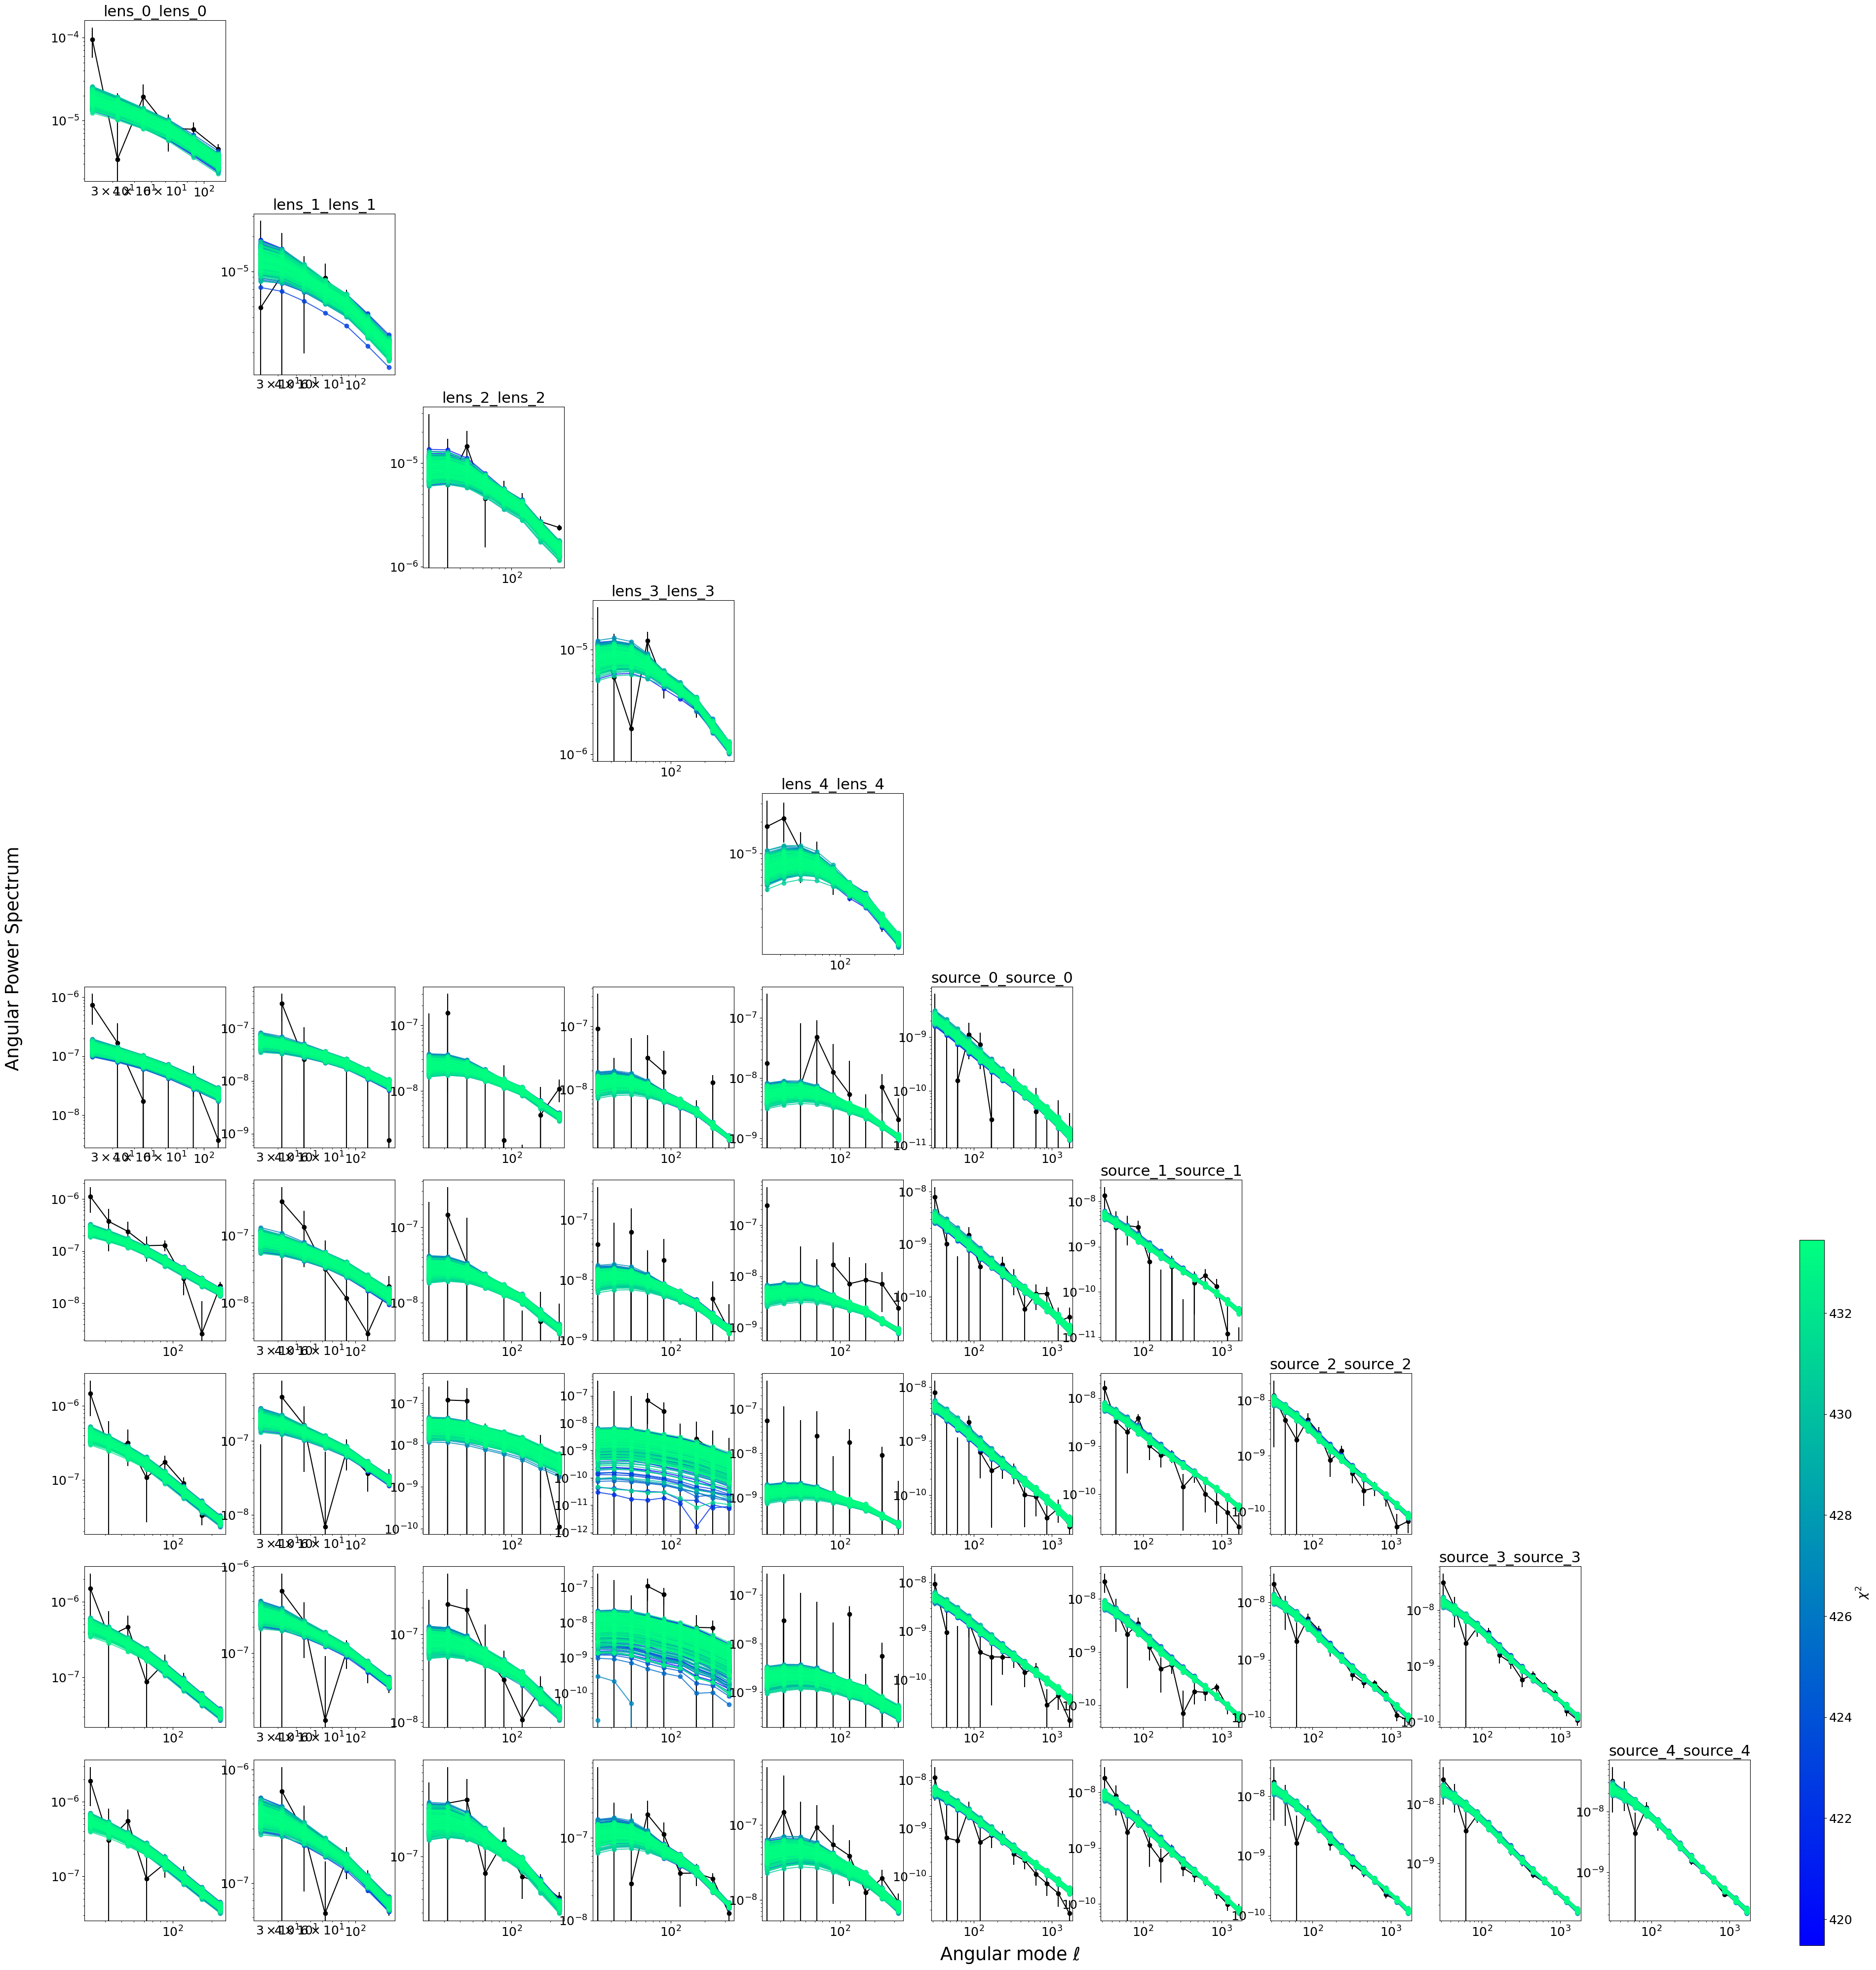

In [47]:
g = pacc.plot_cls([[cle_3x2], lkl_3x2_nomarg_cles], cle_3x2.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
                    "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/validation_3x2.pdf", bbox_inches='tight')